In [7]:
%run "./2_Methods.ipynb"

In [8]:
#print(f'Available CPUs: {mproc.cpu_count()}')
print(f'Configured user-id: {TARGET_CLASS_USER_ID}')
print(f'Configured password: {DATA_PASSWORD}')
print(f'Positive class data: {positive_class_data.shape[0]} samples with {feature_count} features')

Configured user-id: 999
Configured password: greyc laboratory
Positive class data: 115 samples with 77 features


# Data Analysis

### Min/Max Visualization

In [ ]:
data_values = multi_class_data[DATA_COLS].values

max_dataframe = create_dataframe([np.max(data_values, axis=0)], 'max', DATA_COLS)
mean_dataframe = create_dataframe([np.mean(data_values, axis=0)], 'mean', DATA_COLS)
min_dataframe = create_dataframe([np.min(data_values, axis=0)], 'min', DATA_COLS)

combined_dataframe = pd.concat([max_dataframe, mean_dataframe, min_dataframe], ignore_index=True)
for key_col in KEY_COLS:
    combined_dataframe[key_col] = pd.to_numeric(DATA[key_col][0], downcast='unsigned')

plot_pp_data(combined_dataframe, DATA_PASSWORD, 
    target_category=None,
    plot_type='line', #'datapoints', 'violin', 'overlap', 'line'
    trim_outliers=True,
    display=True,
    save=False
)

### Sample Data Visualization

In [ ]:
samples = multi_class_data[DATA_COLS].values[np.random.choice(len(multi_class_data), 20, replace=False)]
sample_dataframes = [create_dataframe([sample], f'sample-{idx}', DATA_COLS) for idx, sample in enumerate(samples)]

means = np.mean(samples, axis=0)
mean_dataframe = create_dataframe([means], 'mean', DATA_COLS)

combined_dataframe = pd.concat([*sample_dataframes, mean_dataframe], ignore_index=True)
for key_col in KEY_COLS:
    combined_dataframe[key_col] = pd.to_numeric(DATA[key_col][0], downcast='unsigned')

plot_pp_data(combined_dataframe, DATA_PASSWORD, 
    target_category=None,
    plot_type='line', #'datapoints', 'violin', 'overlap', 'line'
    trim_outliers=True,
    display=True,
    save=False
)

### Plot Input Data

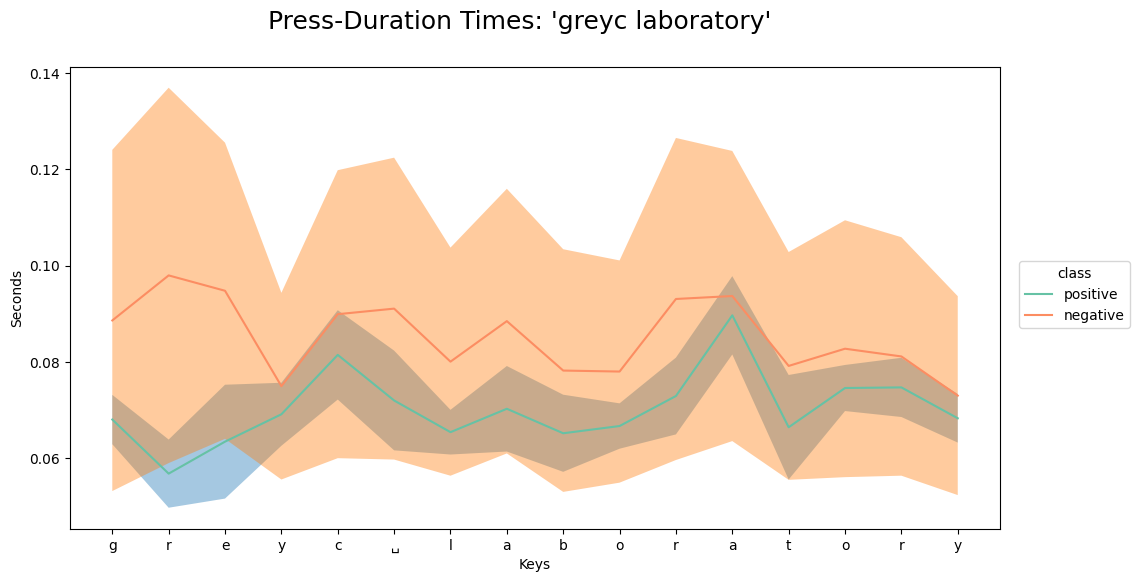

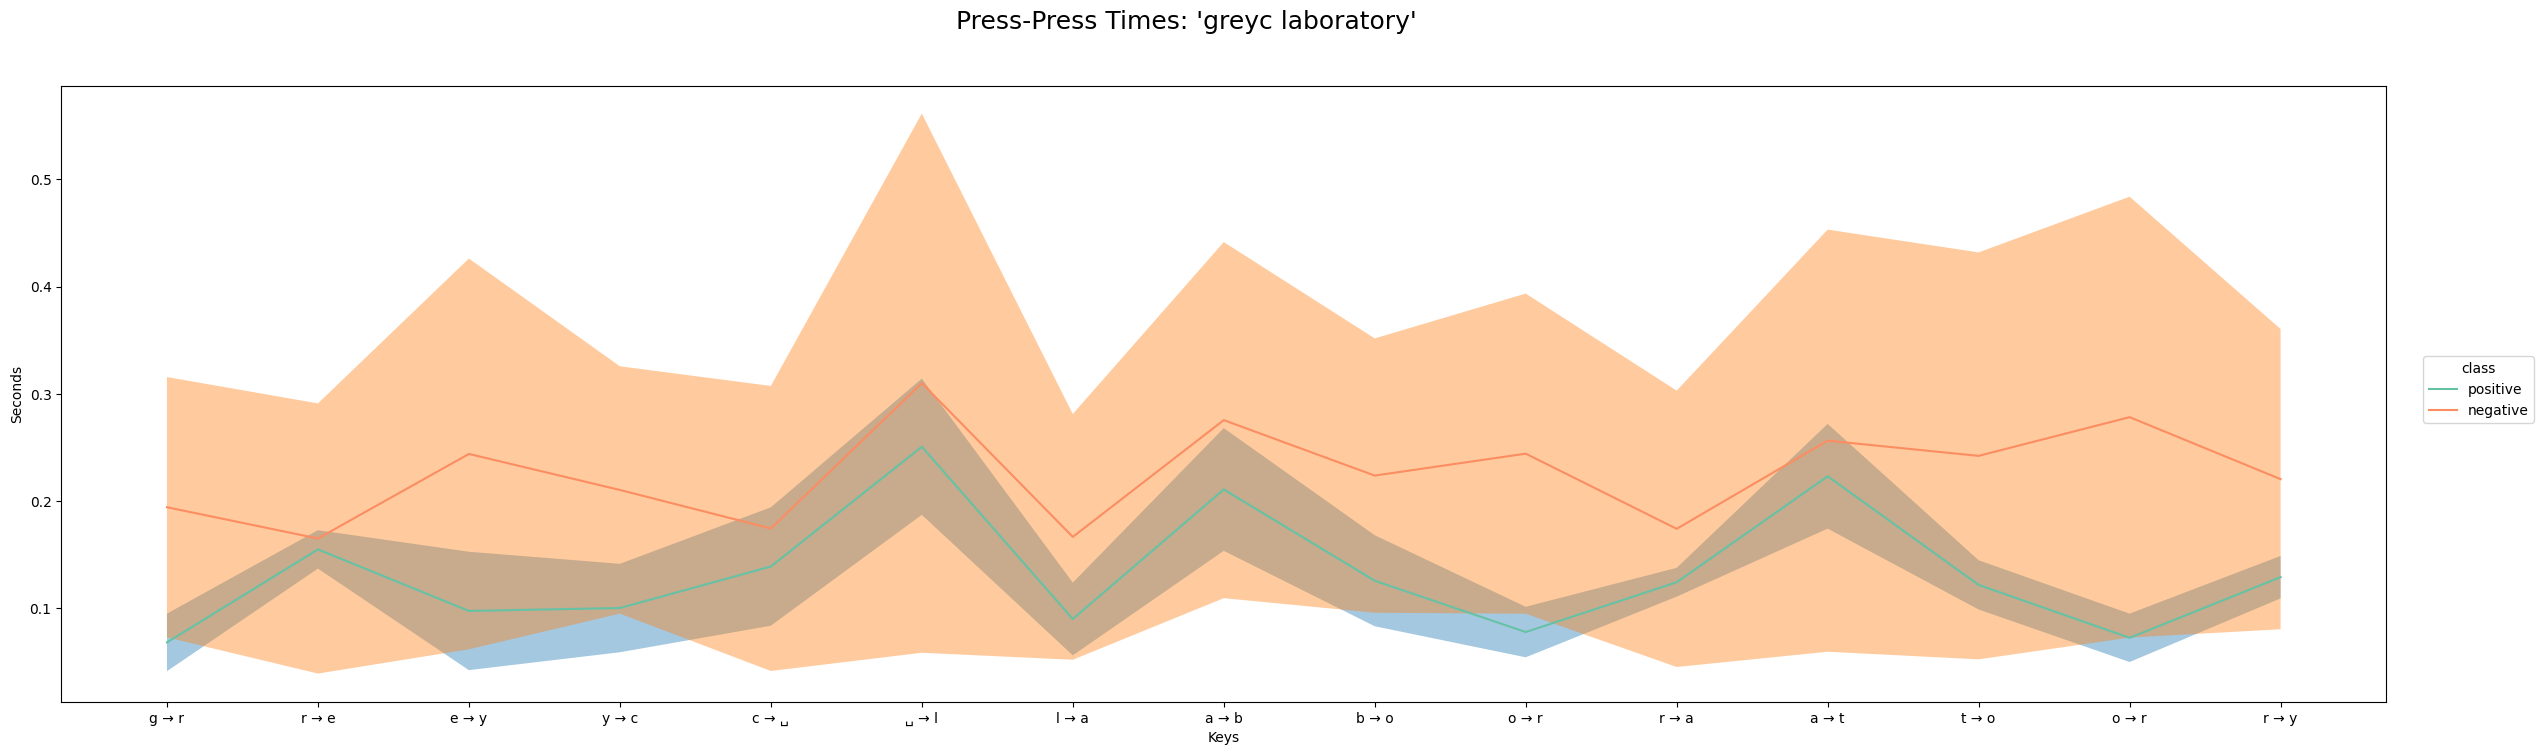

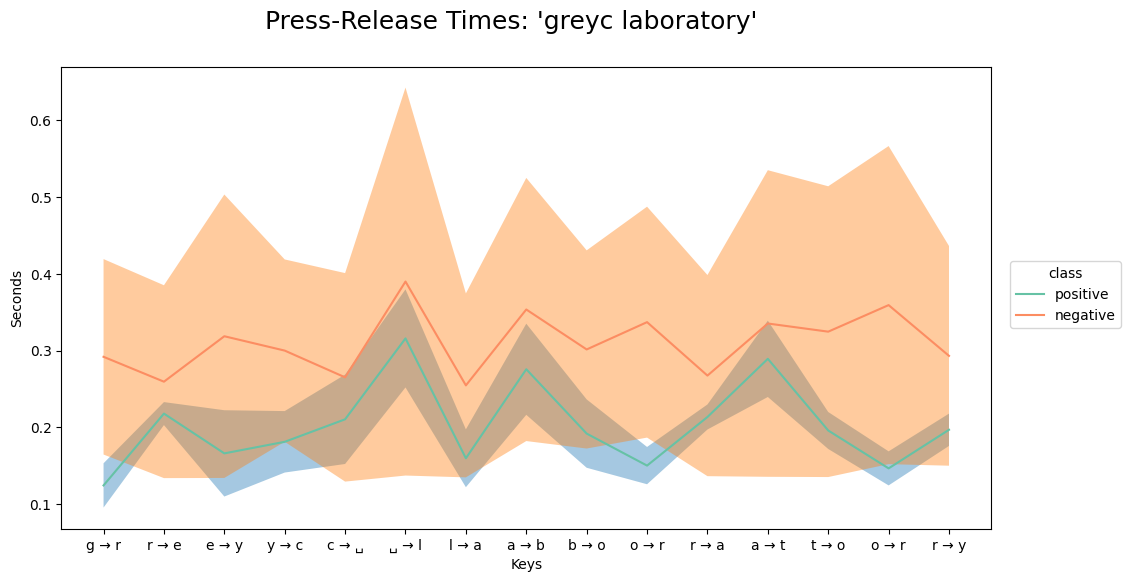

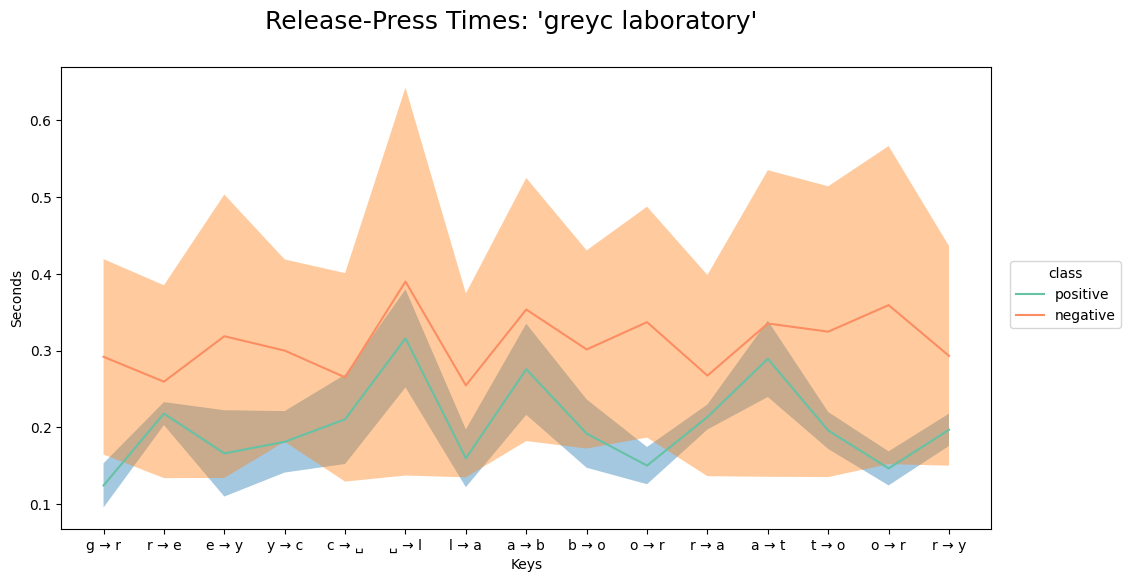

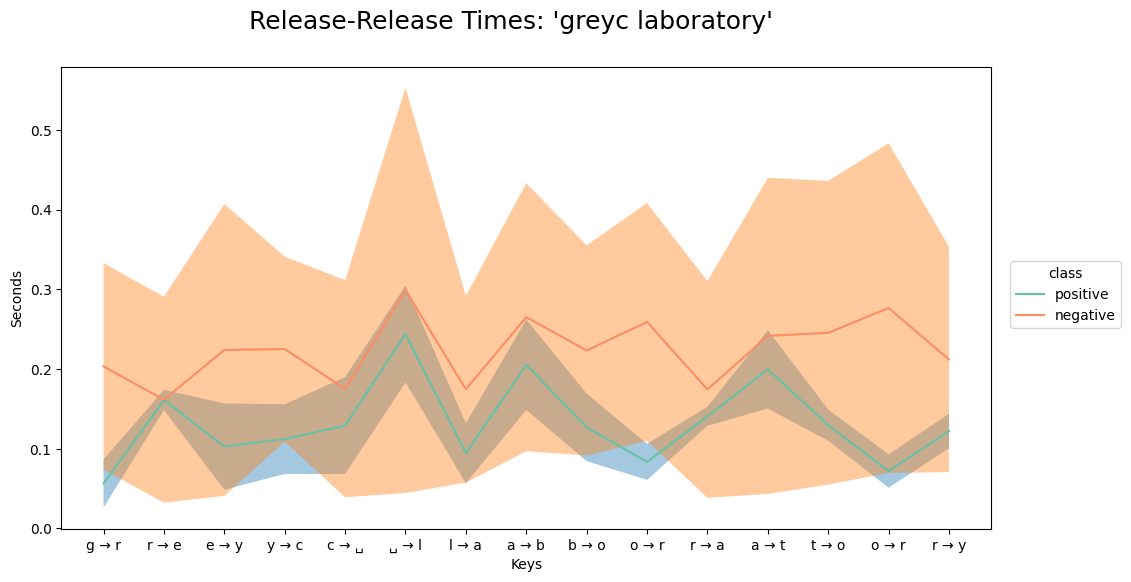

In [16]:
%matplotlib inline

# for graph visualization purposes, comment out for computations:
binary_class_data.loc[binary_class_data[CLASS_COL] != positive_class, [CLASS_COL]] = 'negative'
binary_class_data.loc[binary_class_data[CLASS_COL] == positive_class, [CLASS_COL]] = 'positive'

plot_d_data(binary_class_data, DATA_PASSWORD, 
              plot_type=PLOT_TYPE, #'datapoints', 'violin', 'overlap', 'line'
              class_categories=['positive', 'negative'],
              target_category=None, 
              trim_outliers=True,
              display=True,
              width=12, height=6,
              save=False
         )
plot_pp_data(binary_class_data, DATA_PASSWORD, 
              plot_type=PLOT_TYPE, #'datapoints', 'violin', 'overlap', 'line'
              class_categories=['positive', 'negative'],
              target_category=None,
              trim_outliers=True,
              display=True,
              save=False
         )
plot_pr_data(binary_class_data, DATA_PASSWORD, 
              plot_type=PLOT_TYPE, #'datapoints', 'violin', 'overlap', 'line'
              class_categories=['positive', 'negative'],
              target_category=None, 
              trim_outliers=True,
              display=True,
              width=12, height=6,
              save=False
         )
plot_rp_data(binary_class_data, DATA_PASSWORD, 
              plot_type=PLOT_TYPE, #'datapoints', 'violin', 'overlap', 'line'
              class_categories=['positive', 'negative'],
              target_category=None,
              trim_outliers=True,
              display=True,
              width=12, height=6,
              save=False
         )
plot_rr_data(binary_class_data, DATA_PASSWORD, 
              plot_type=PLOT_TYPE, #'datapoints', 'violin', 'overlap', 'line'
              class_categories=['positive', 'negative'],
              target_category=None,
              trim_outliers=True,
              display=True,
              width=12, height=6,
              save=False
         )

# Data Augmentation

In [14]:
# Broken down into steps for visualization purposes, 
# actual generation for classification input data happens in the Autoencoder class
positive = positive_class_data[DATA_COLS].values
(normalized, maxima, minima) = normalize(positive)
generated_similar = synthesize_normal(normalized, 500)
denormalized = denormalize(generated_similar, maxima, minima) # = augmented
generated_dissimilar = synthesize_dissimilar(positive, 5000)
true_negative = negative_class_data[DATA_COLS].values

positive_dataframe = create_dataframe(positive, 'positive', DATA_COLS)
normalized_dataframe = create_dataframe(normalized, 'normalized', DATA_COLS)
generated_similar_dataframe = create_dataframe(generated_similar, 'similar (generated)', DATA_COLS)
denormalized_dataframe = create_dataframe(denormalized, 'denormalized (augmented)', DATA_COLS)
augmented_dataframe = create_dataframe(denormalized, 'augmented', DATA_COLS)
generated_dissimilar_dataframe = create_dataframe(generated_dissimilar, 'dissimilar (generated)', DATA_COLS)
true_negative_dataframe = create_dataframe(true_negative, 'negative', DATA_COLS)

#### POSITIVE class vs NEGATIVE class: 

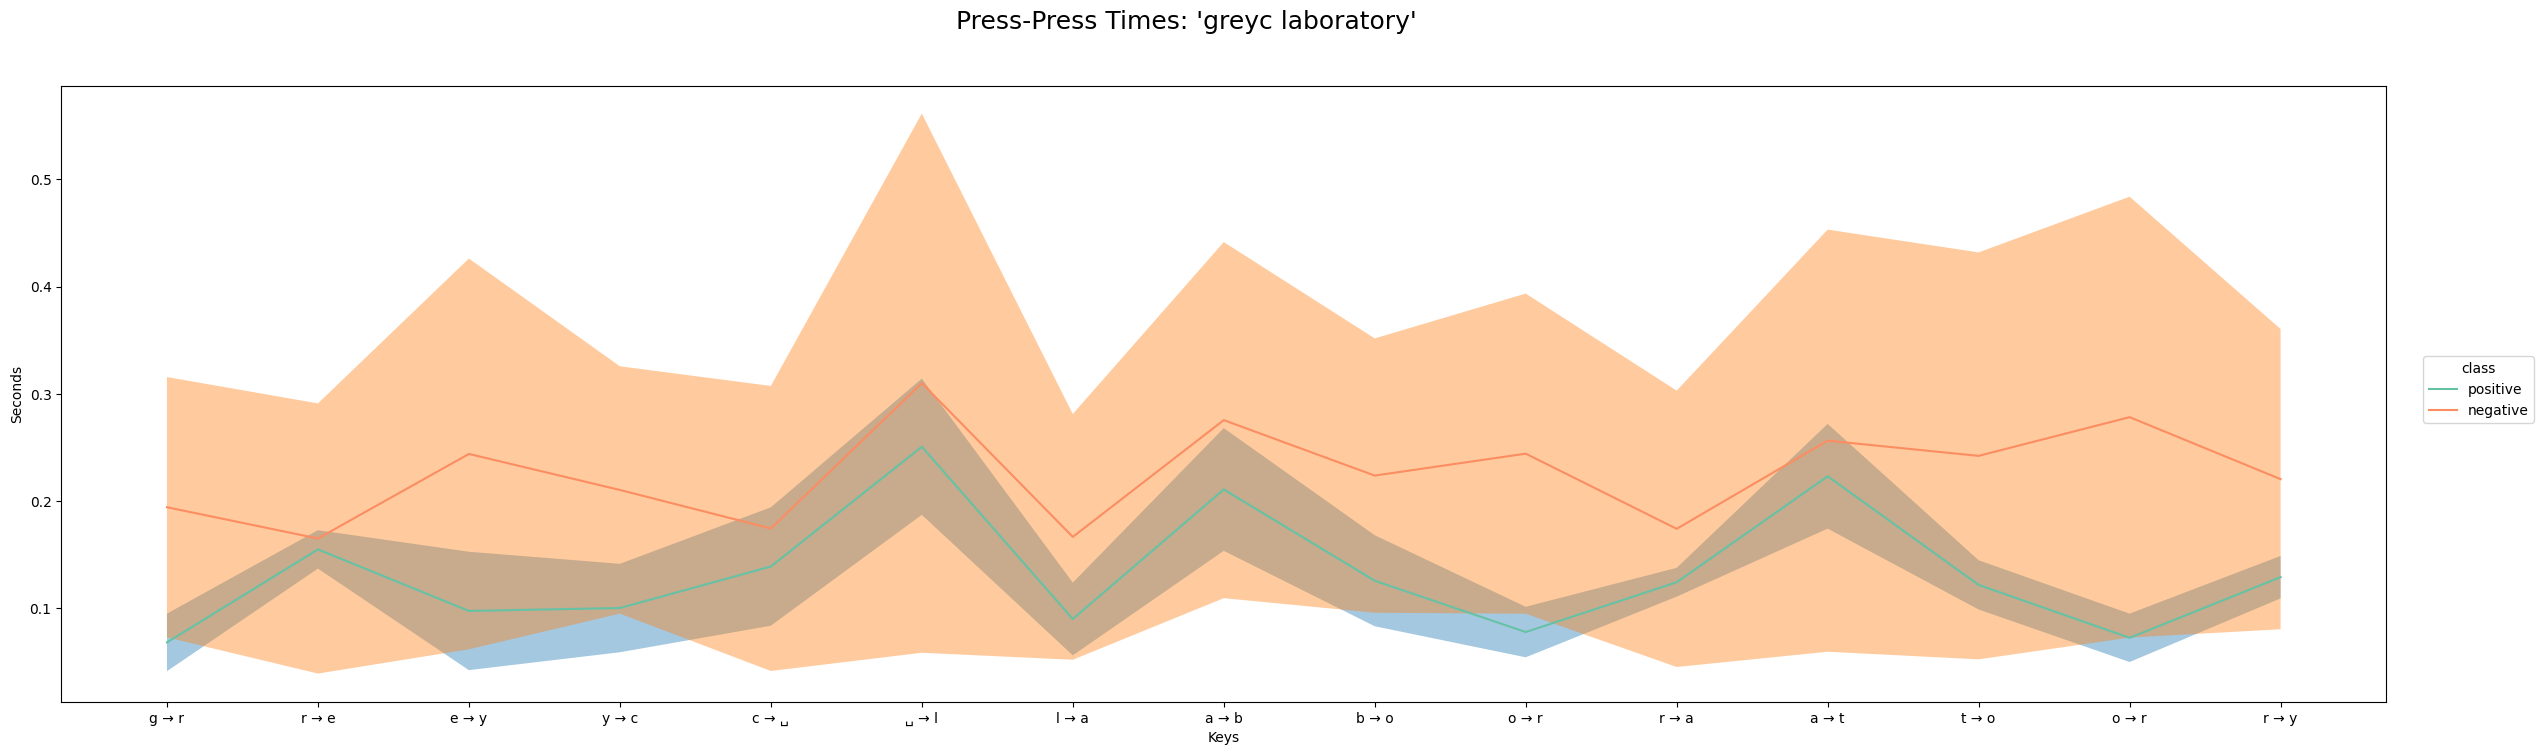

In [4]:
combined_dataframe = pd.concat([positive_dataframe, true_negative_dataframe], ignore_index=True)
for key_col in KEY_COLS:
    combined_dataframe[key_col] = pd.to_numeric(DATA[key_col][0], downcast='unsigned')

plot_pp_data(combined_dataframe, DATA_PASSWORD, 
    class_categories=['positive', 'negative'],
    target_category=None,
    plot_type='line', #'datapoints', 'violin', 'overlap', 'line'
    trim_outliers=True,
    display=True,
    save=False
)

#### NORMALIZATION step:

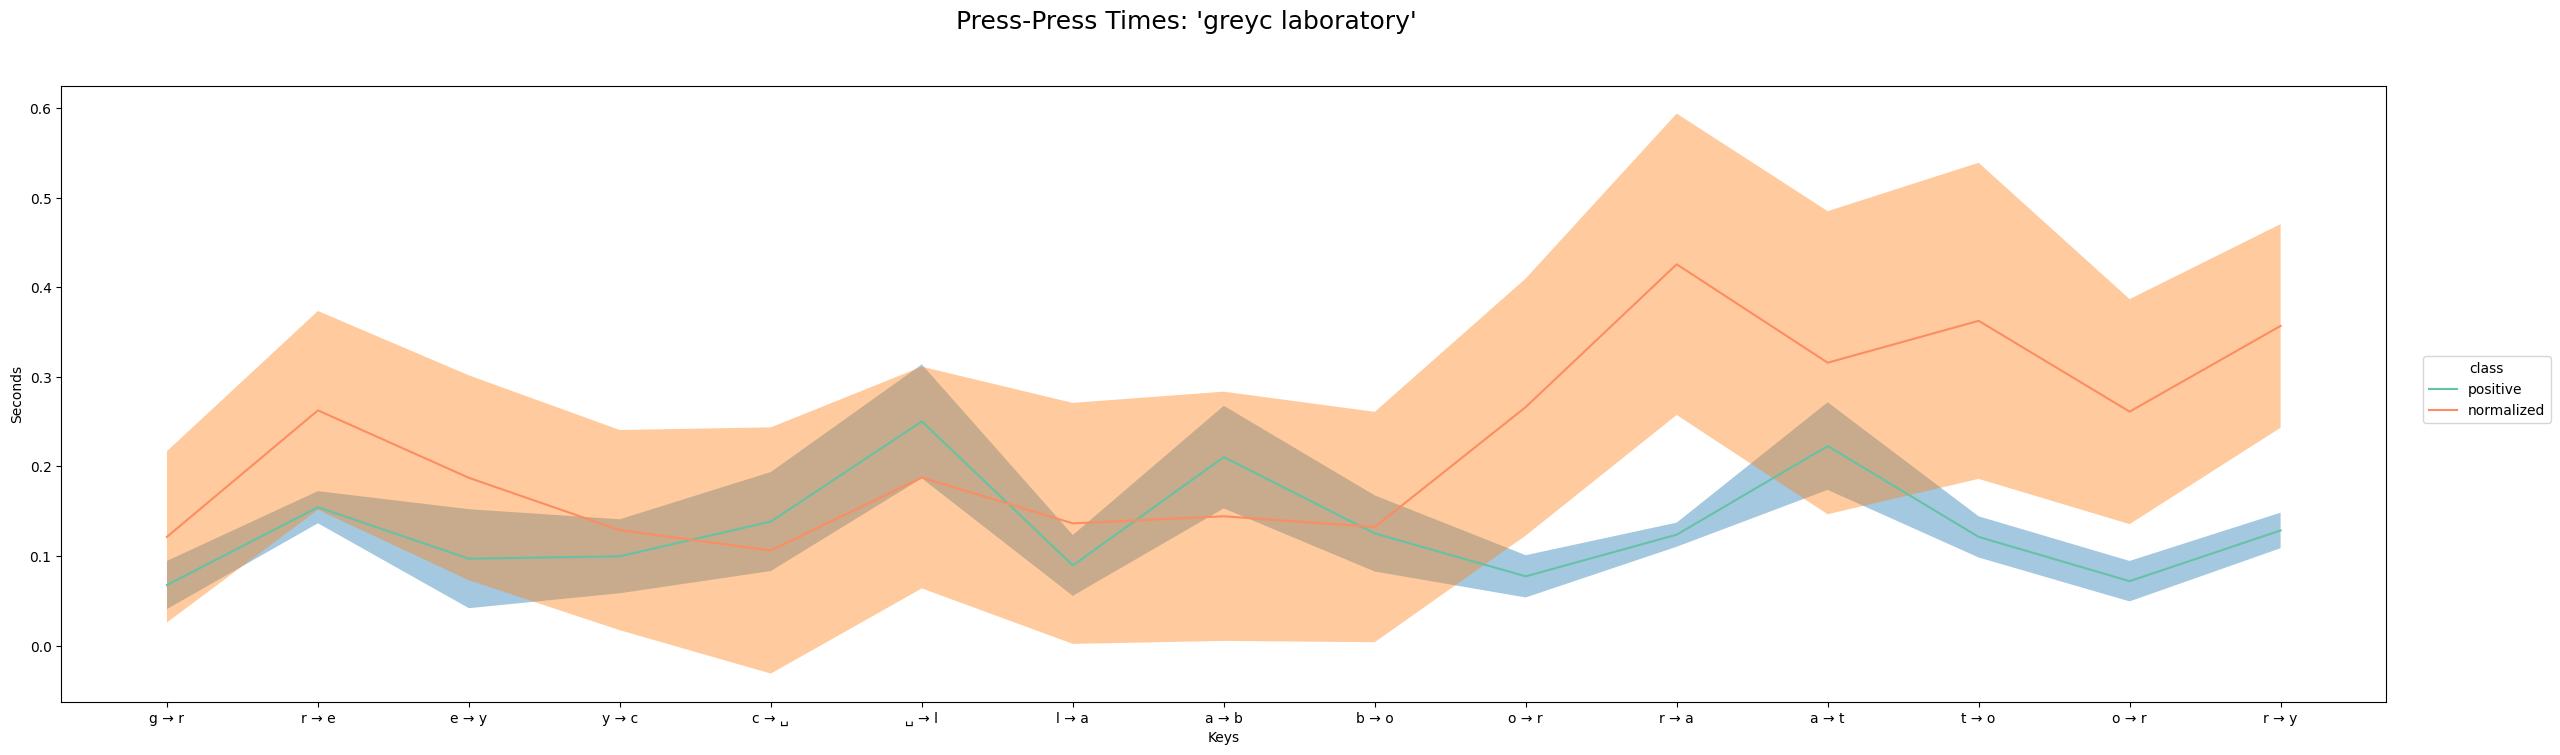

In [5]:
combined_dataframe = pd.concat([positive_dataframe, normalized_dataframe], ignore_index=True)
for key_col in KEY_COLS:
    combined_dataframe[key_col] = pd.to_numeric(DATA[key_col][0], downcast='unsigned')

plot_pp_data(combined_dataframe, DATA_PASSWORD, 
    class_categories=['positive', 'normalized'],
    target_category=None,
    plot_type='line', #'datapoints', 'violin', 'overlap', 'line'
    trim_outliers=True,
    display=True,
    save=False
)

#### AUGMENTATION step (similar data generation):

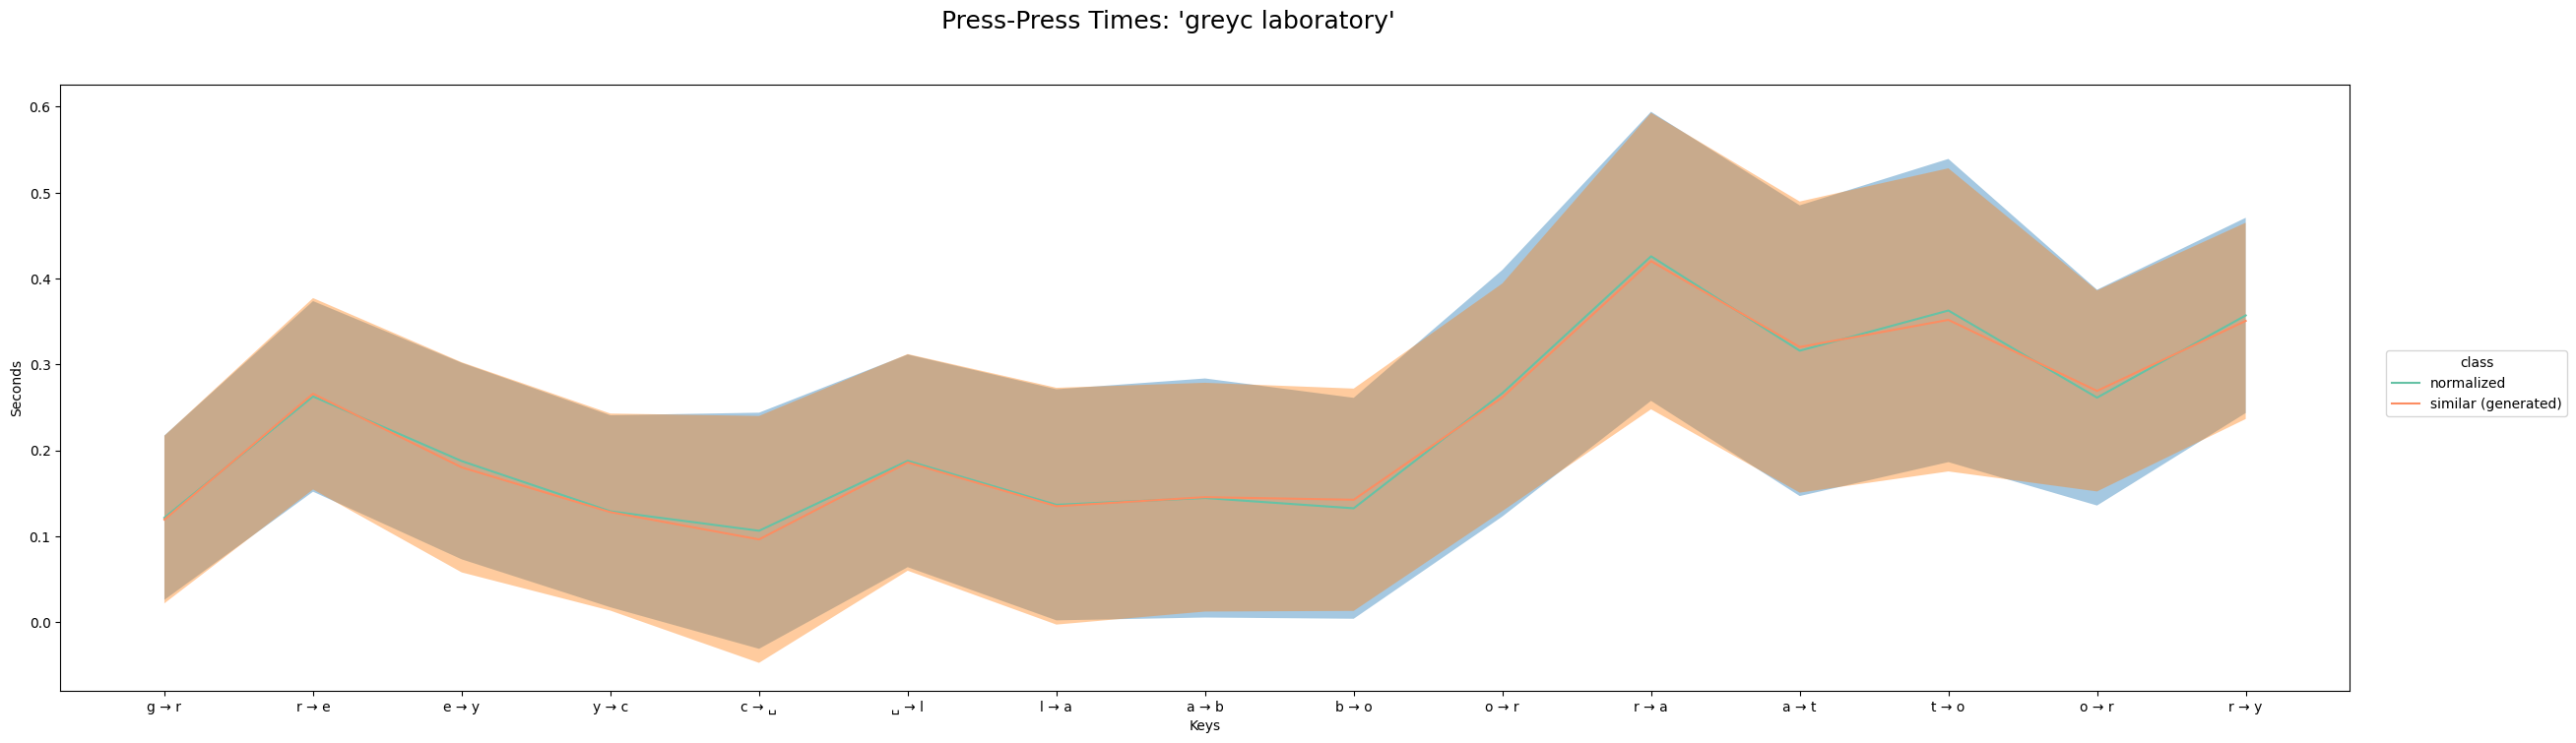

In [6]:
combined_dataframe = pd.concat([normalized_dataframe, generated_similar_dataframe], ignore_index=True)
for key_col in KEY_COLS:
    combined_dataframe[key_col] = pd.to_numeric(DATA[key_col][0], downcast='unsigned')

plot_pp_data(combined_dataframe, DATA_PASSWORD, 
    class_categories=['normalized', 'similar (generated)'],
    target_category=None,
    plot_type='line', #'datapoints', 'violin', 'overlap', 'line'
    trim_outliers=True,
    display=True,
    save=False
)

#### DENORMALIZATION step (transforming augmented data to look like positive class):

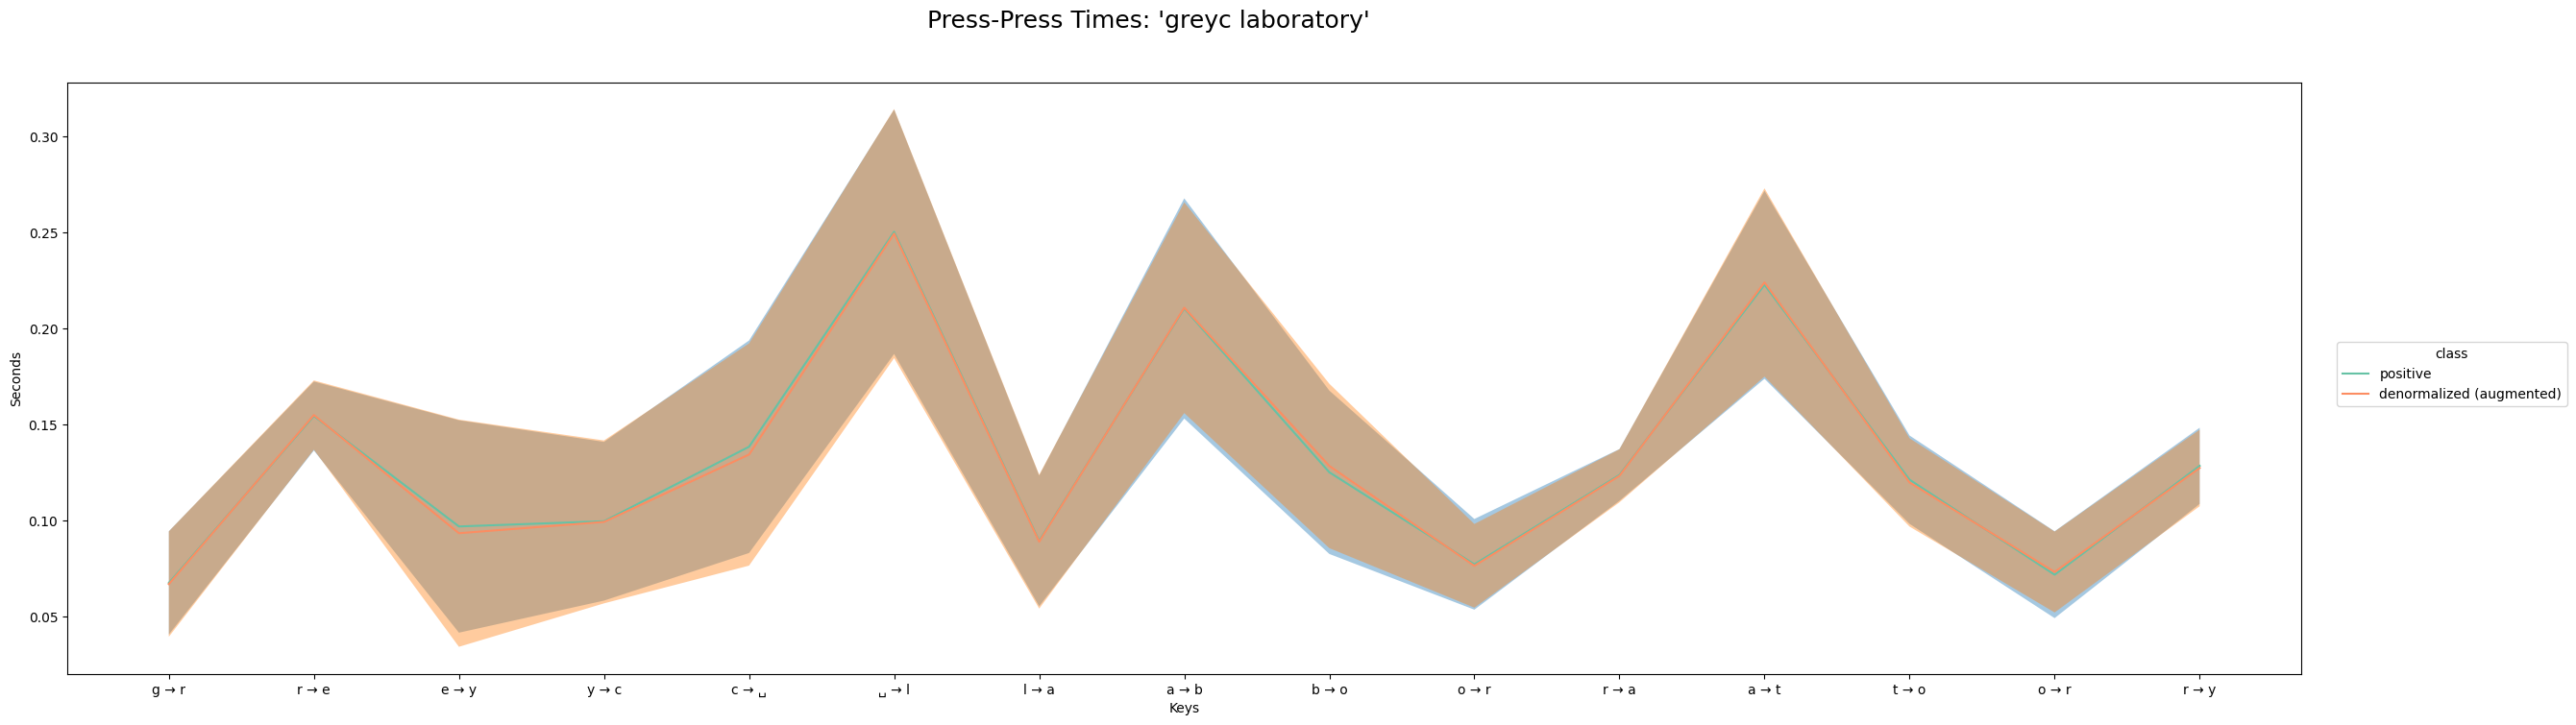

In [7]:
combined_dataframe = pd.concat([positive_dataframe, denormalized_dataframe], ignore_index=True)
for key_col in KEY_COLS:
    combined_dataframe[key_col] = pd.to_numeric(DATA[key_col][0], downcast='unsigned')

plot_pp_data(combined_dataframe, DATA_PASSWORD, 
    class_categories=['positive', 'denormalized (augmented)'],
    target_category=None,
    plot_type='line', #'datapoints', 'violin', 'overlap', 'line'
    trim_outliers=True,
    display=True,
    save=False
)

#### GENERATING NEGATIVE data (dissimilar data generation):

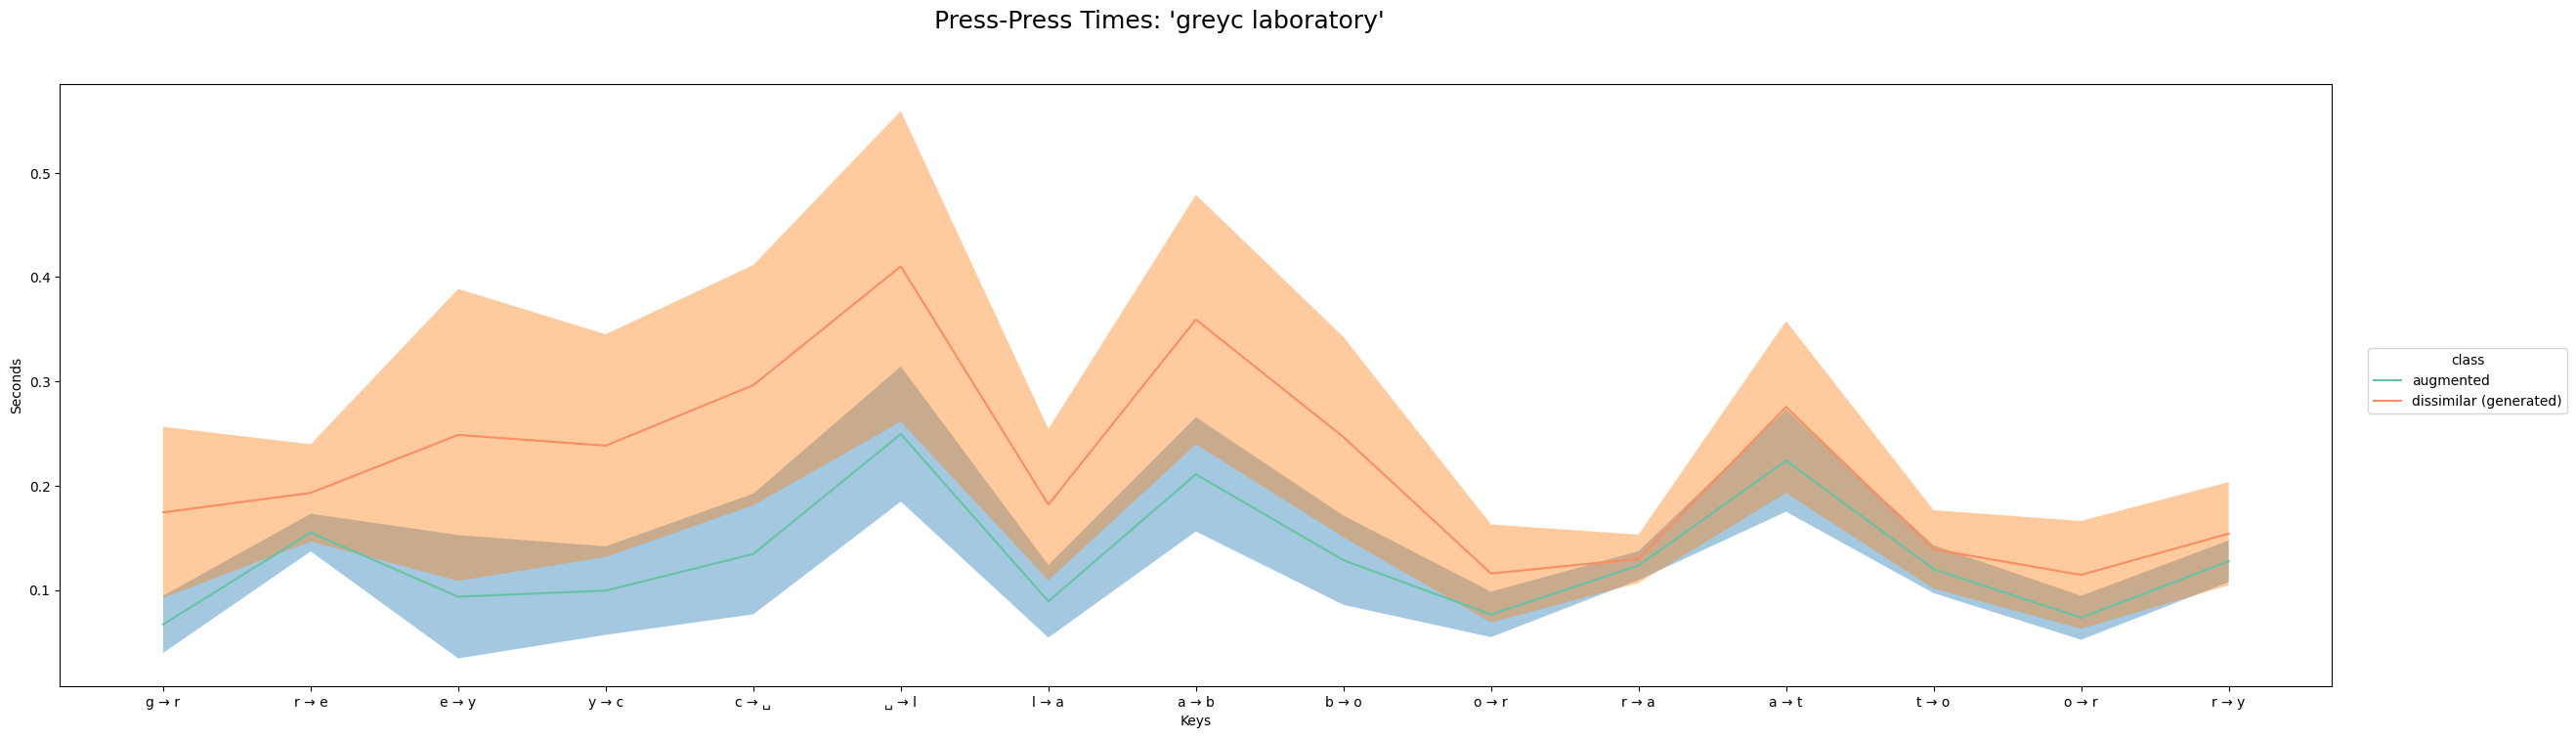

In [8]:
combined_dataframe = pd.concat([augmented_dataframe, generated_dissimilar_dataframe], ignore_index=True)
for key_col in KEY_COLS:
    combined_dataframe[key_col] = pd.to_numeric(DATA[key_col][0], downcast='unsigned')

plot_pp_data(combined_dataframe, DATA_PASSWORD, 
    class_categories=['augmented', 'dissimilar (generated)'],
    target_category=None,
    plot_type='line', #'datapoints', 'violin', 'overlap', 'line'
    trim_outliers=True,
    display=True,
    save=False
)

#### POSITIVE vs GENERATED DISSIMILAR vs NEGATIVE classes:

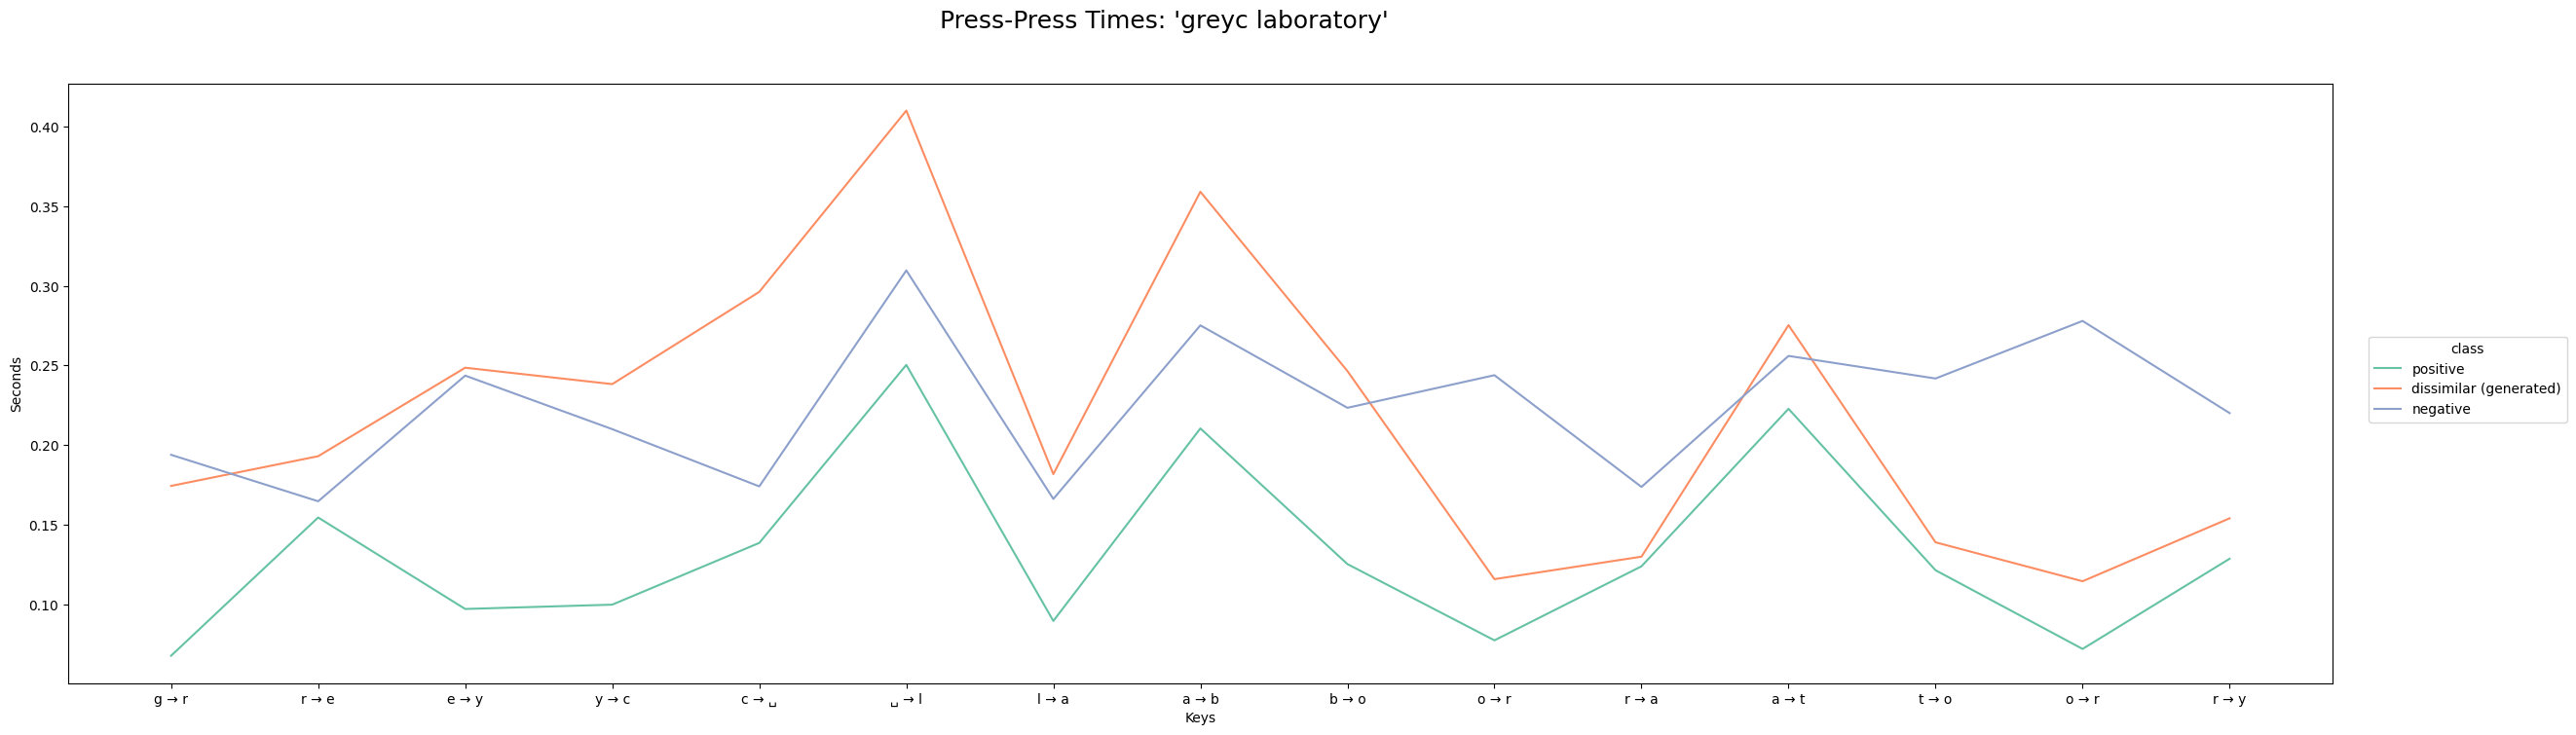

In [9]:
combined_dataframe = pd.concat([positive_dataframe, generated_dissimilar_dataframe, true_negative_dataframe], ignore_index=True)
for key_col in KEY_COLS:
    combined_dataframe[key_col] = pd.to_numeric(DATA[key_col][0], downcast='unsigned')
    
plot_pp_data(combined_dataframe, DATA_PASSWORD, 
    class_categories=['positive', 'dissimilar (generated)', 'negative'],
    target_category=None,
    plot_type='line', #'datapoints', 'violin', 'overlap', 'line'
    trim_outliers=True,
    display=True,
    save=False
)

# Autoencoder Evaluation

In [16]:
%run "./3_Autoencoder.ipynb"

In [17]:
X = positive_class_data[DATA_COLS].values
N = negative_class_data[DATA_COLS].values

In [18]:
# Hyperparameter evaluation code moved to 3_Autoencoder.ipynb

# Evaluating autoencoders and writing to .csv file for analysis
# find_autoencoder_hyperparameters(X, DATA_PASSWORD, direct_to_file=True)

### Evaluating Best Performing Autoencoders:

In [19]:
# Find well-performing autoencoders:
evaluated_autoencoders = find_autoencoder_hyperparameters(X, DATA_PASSWORD)    

Starting training & evaluation for 50 autoencoders:
Starting initialization on autoencoder #1.
Finished training autoencoder #1 after 6.56 seconds.
Starting initialization on autoencoder #2.
Finished training autoencoder #2 after 6.51 seconds.
Starting initialization on autoencoder #3.
Finished training autoencoder #3 after 6.78 seconds.
Starting initialization on autoencoder #4.
Finished training autoencoder #4 after 6.59 seconds.
Starting initialization on autoencoder #5.
Finished training autoencoder #5 after 6.57 seconds.
Starting initialization on autoencoder #6.
Finished training autoencoder #6 after 6.59 seconds.
Starting initialization on autoencoder #7.
Finished training autoencoder #7 after 6.69 seconds.
Starting initialization on autoencoder #8.
Finished training autoencoder #8 after 6.65 seconds.
Starting initialization on autoencoder #9.
Finished training autoencoder #9 after 6.57 seconds.
Starting initialization on autoencoder #10.
Finished training autoencoder #10 after 

### Selection of Promising Autoencoders:

Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 100
  optimizer: Adagrad
  learning rate: 0.03
  loss function: Hinge
  random seed: 90507744
  epochs trained: 100
L2 norms:
  positive: 0.011765370145440102
  negative: 72.08361053466797
  delta: 72.07184600830078
  ratio: 6125.76123046875
 


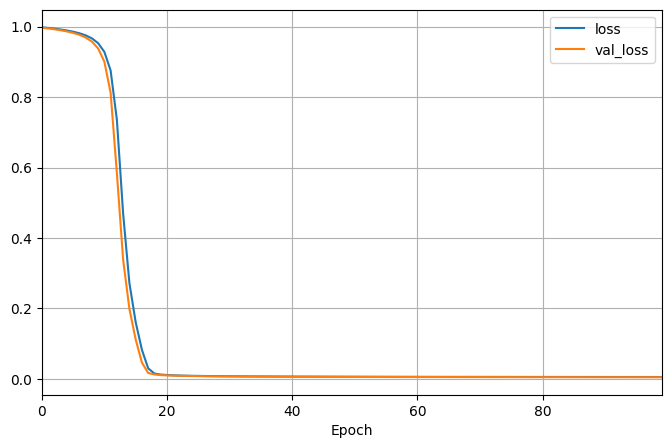

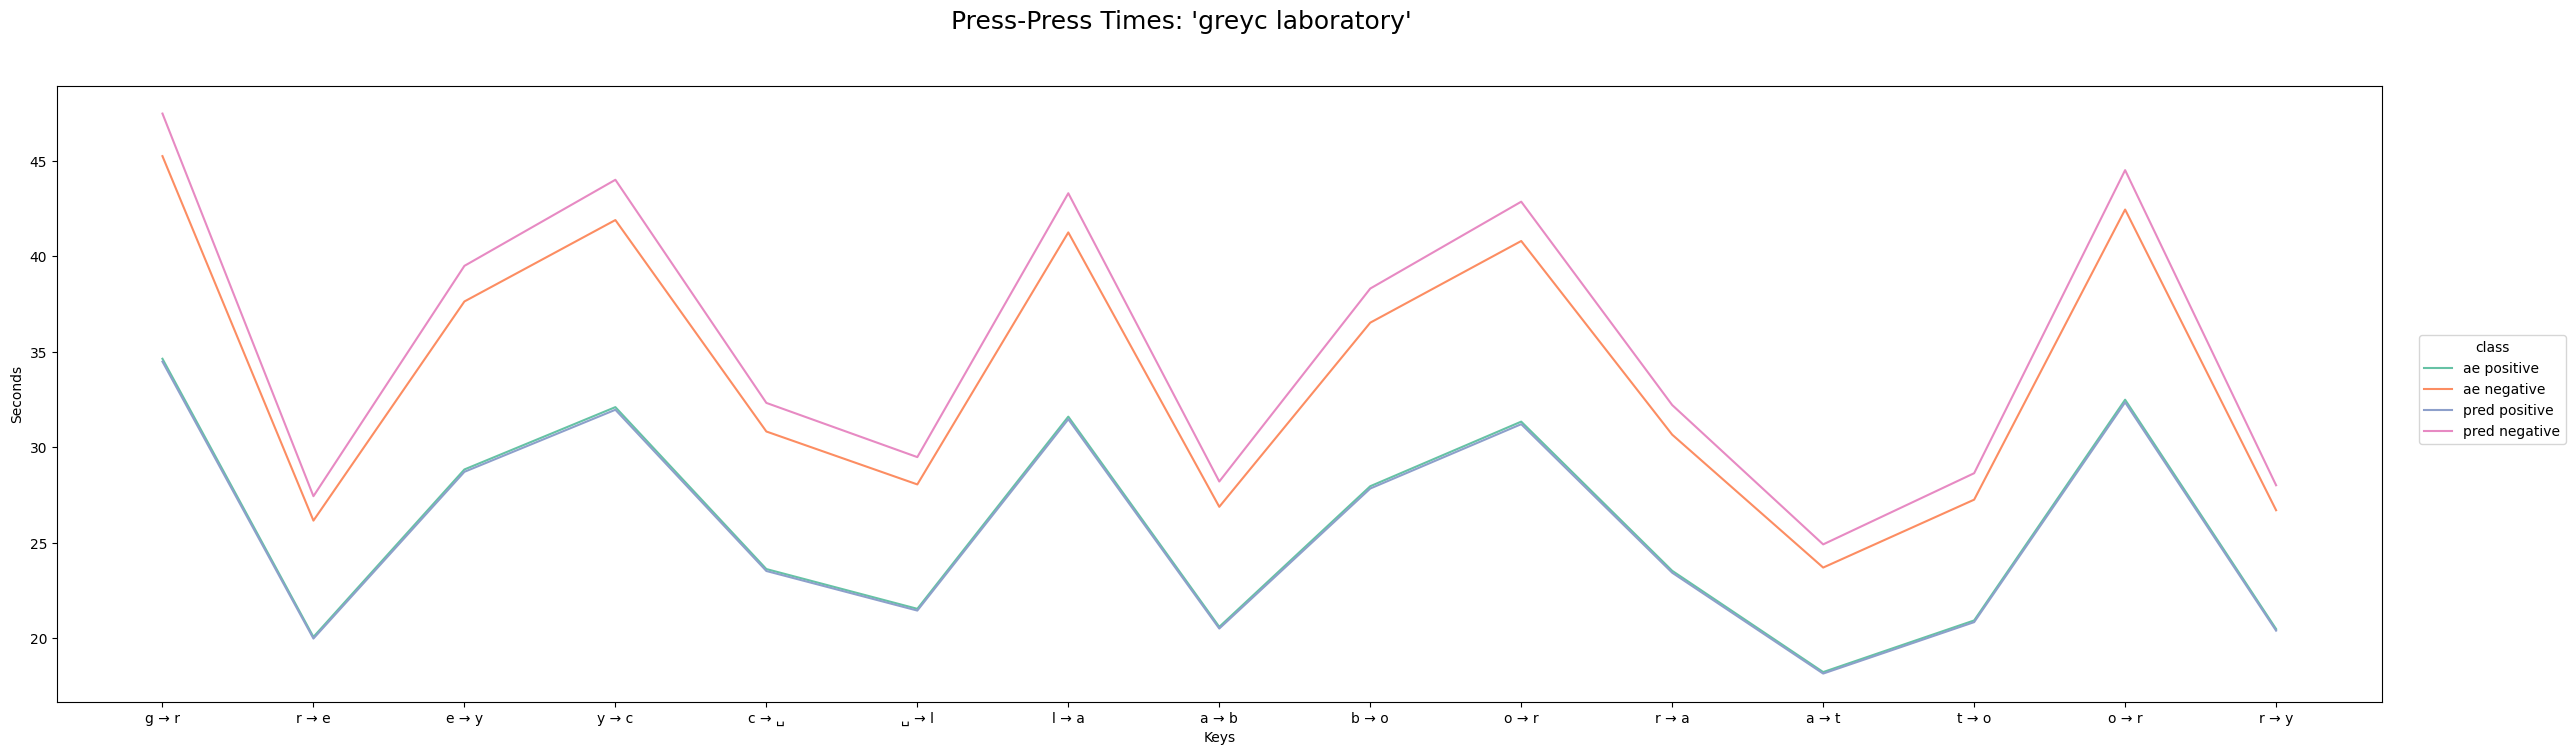

------------------------------------------------------------
Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 100
  optimizer: Adagrad
  learning rate: 0.03
  loss function: Hinge
  random seed: 265373891
  epochs trained: 100
L2 norms:
  positive: 0.017507432028651237
  negative: 75.2315444946289
  delta: 75.21403503417969
  ratio: 4296.1201171875
 


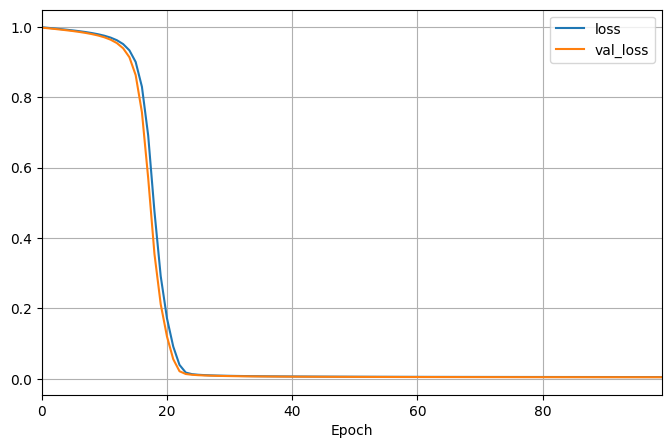

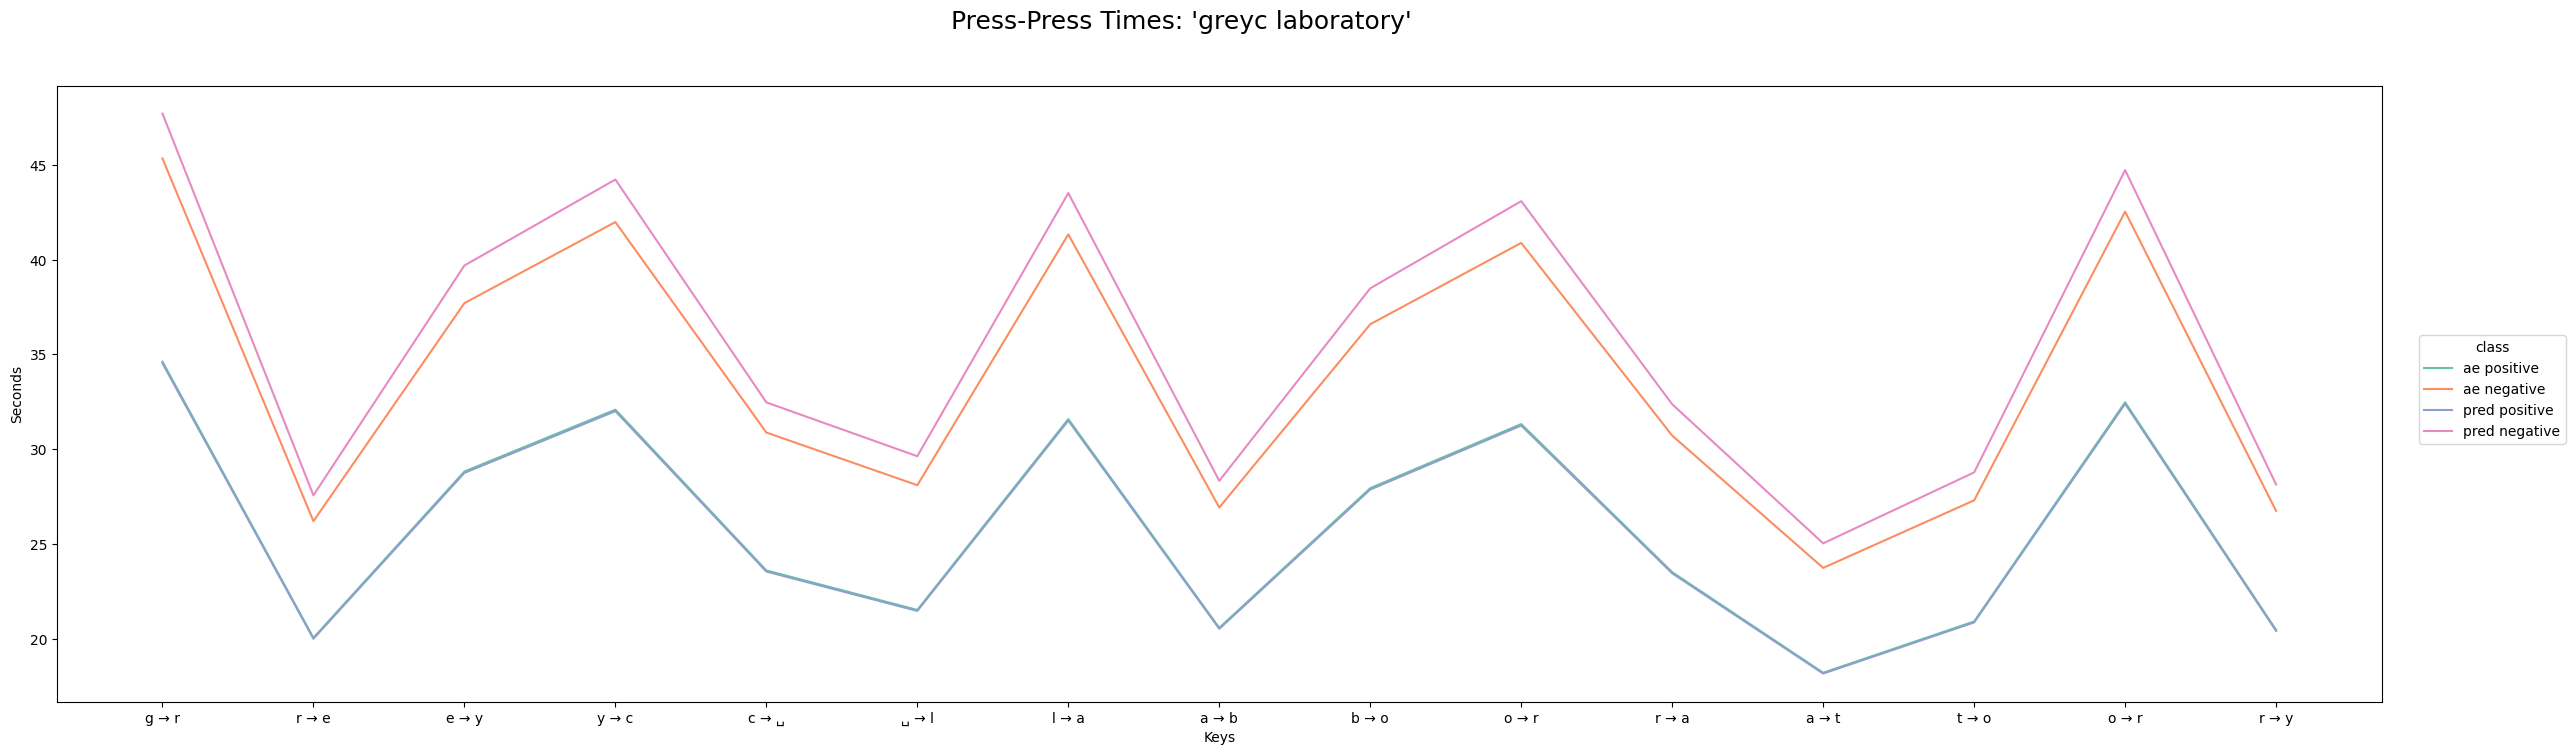

------------------------------------------------------------
Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 100
  optimizer: Adagrad
  learning rate: 0.03
  loss function: Hinge
  random seed: 30294946
  epochs trained: 100
L2 norms:
  positive: 0.029468759894371033
  negative: 78.62377166748047
  delta: 78.59429931640625
  ratio: 2667.037841796875
 


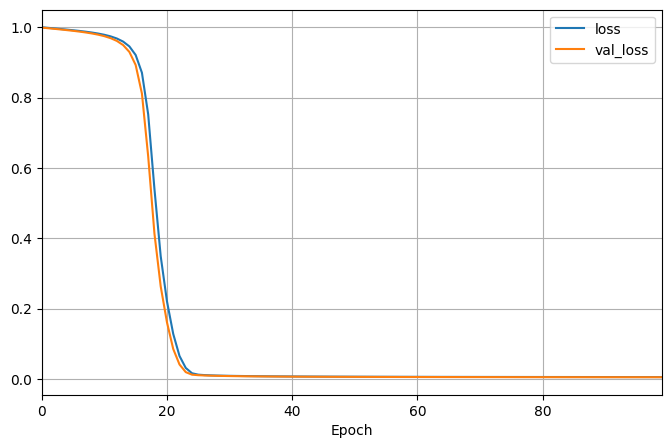

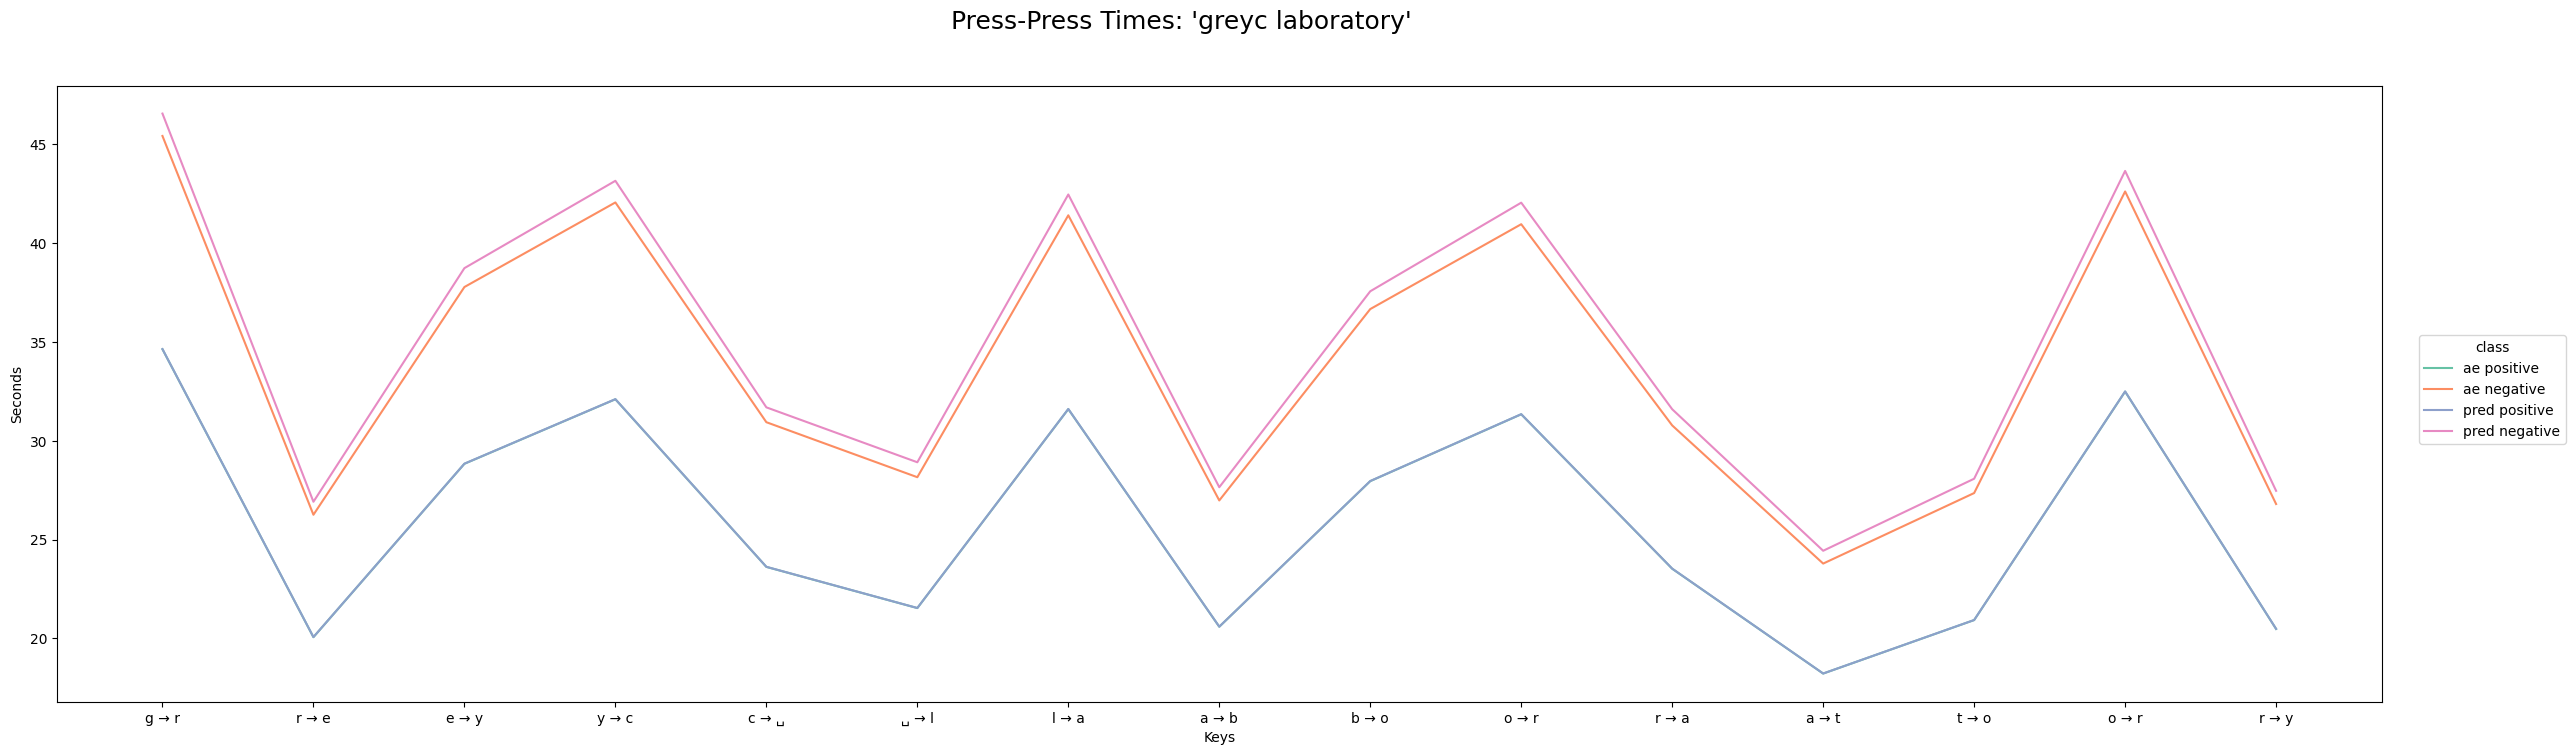

------------------------------------------------------------
Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 100
  optimizer: Adagrad
  learning rate: 0.03
  loss function: Hinge
  random seed: 816906372
  epochs trained: 100
L2 norms:
  positive: 0.028929060325026512
  negative: 75.26765441894531
  delta: 75.23872375488281
  ratio: 2600.80078125
 


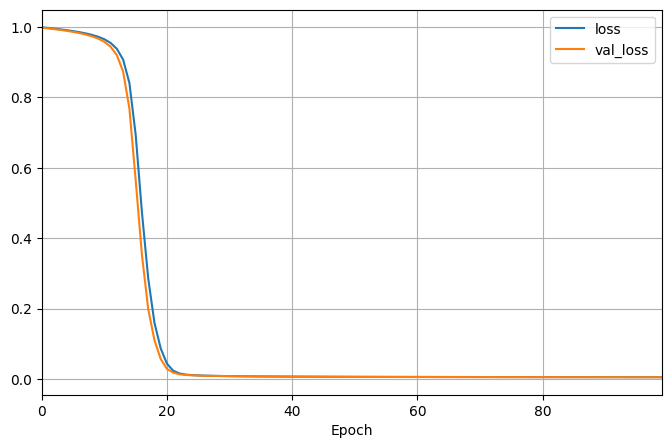

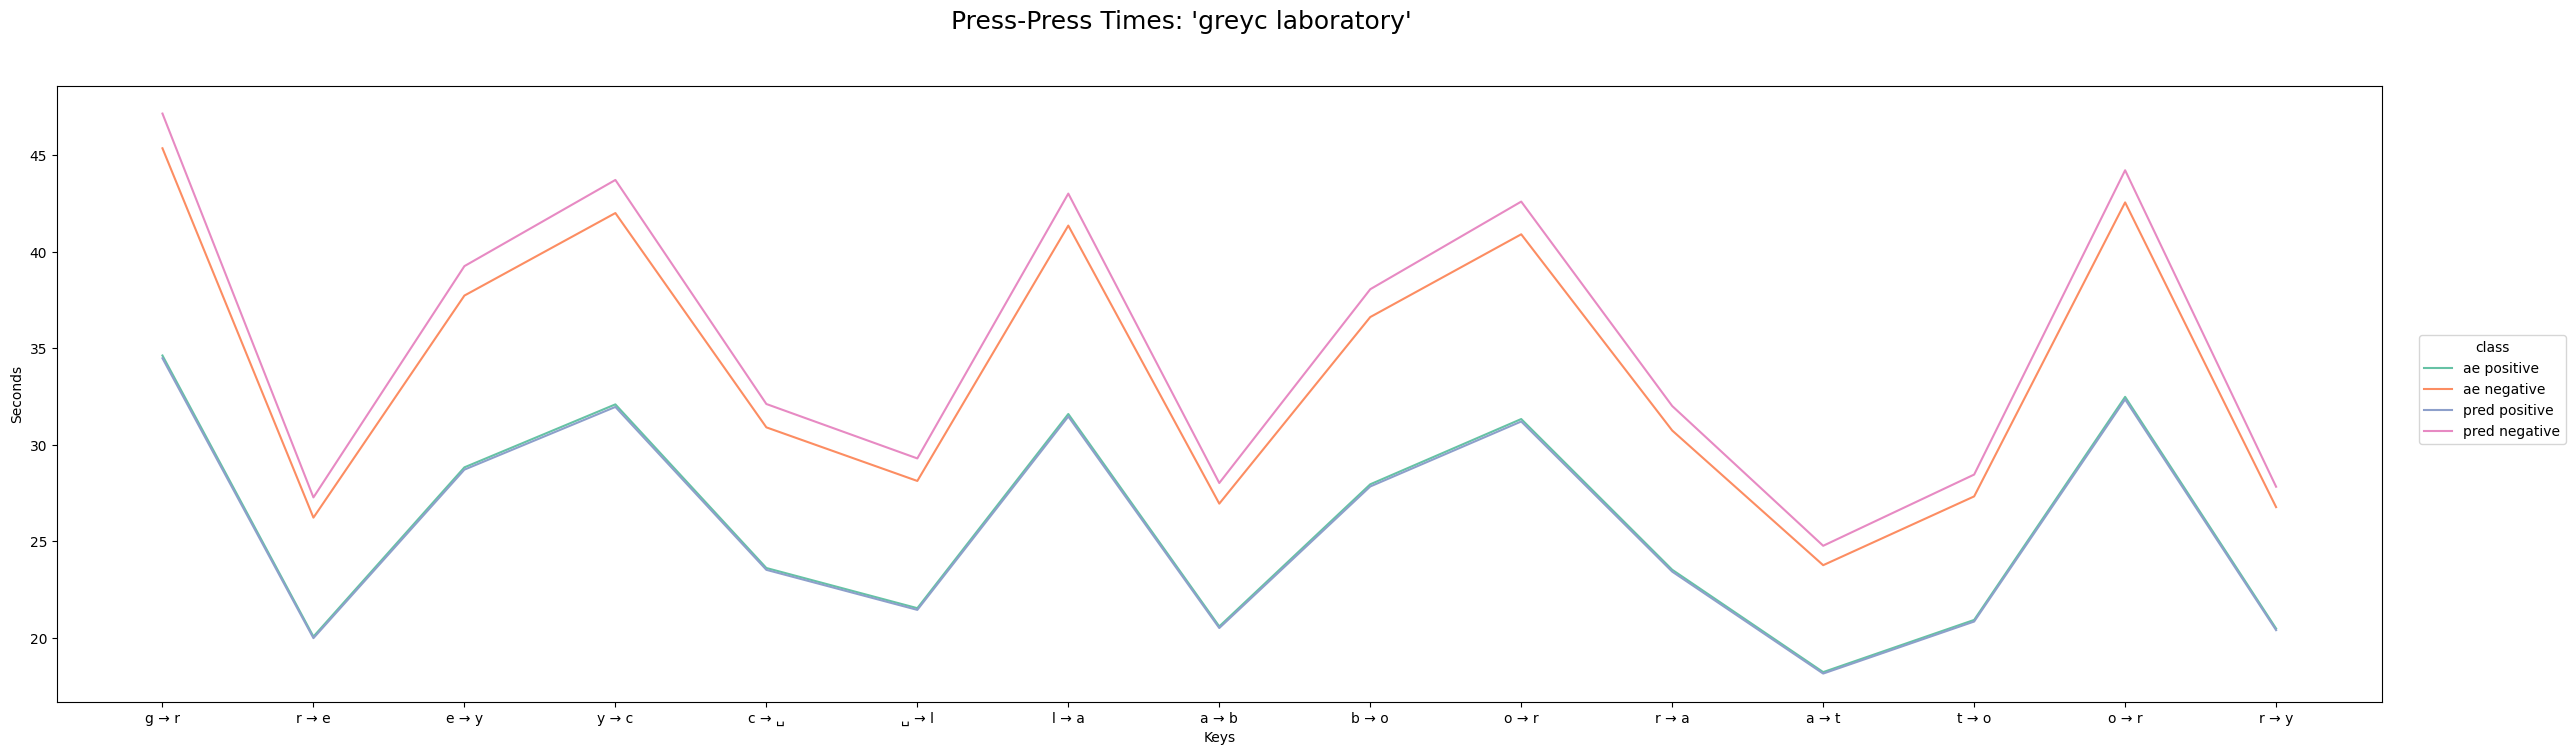

------------------------------------------------------------
Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 100
  optimizer: Adagrad
  learning rate: 0.03
  loss function: Hinge
  random seed: 564659756
  epochs trained: 100
L2 norms:
  positive: 0.036636002361774445
  negative: 82.22570037841797
  delta: 82.1890640258789
  ratio: 2243.39599609375
 


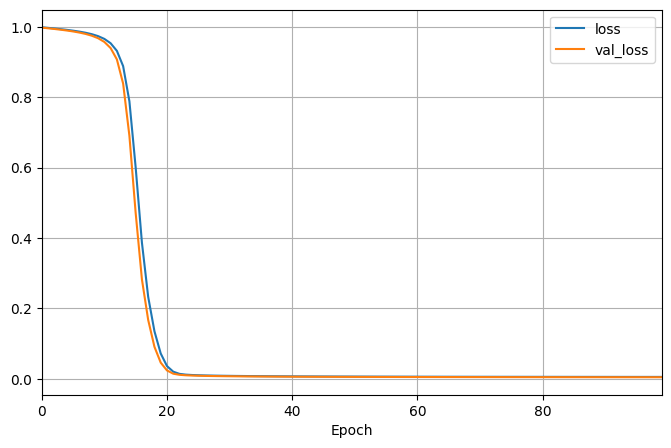

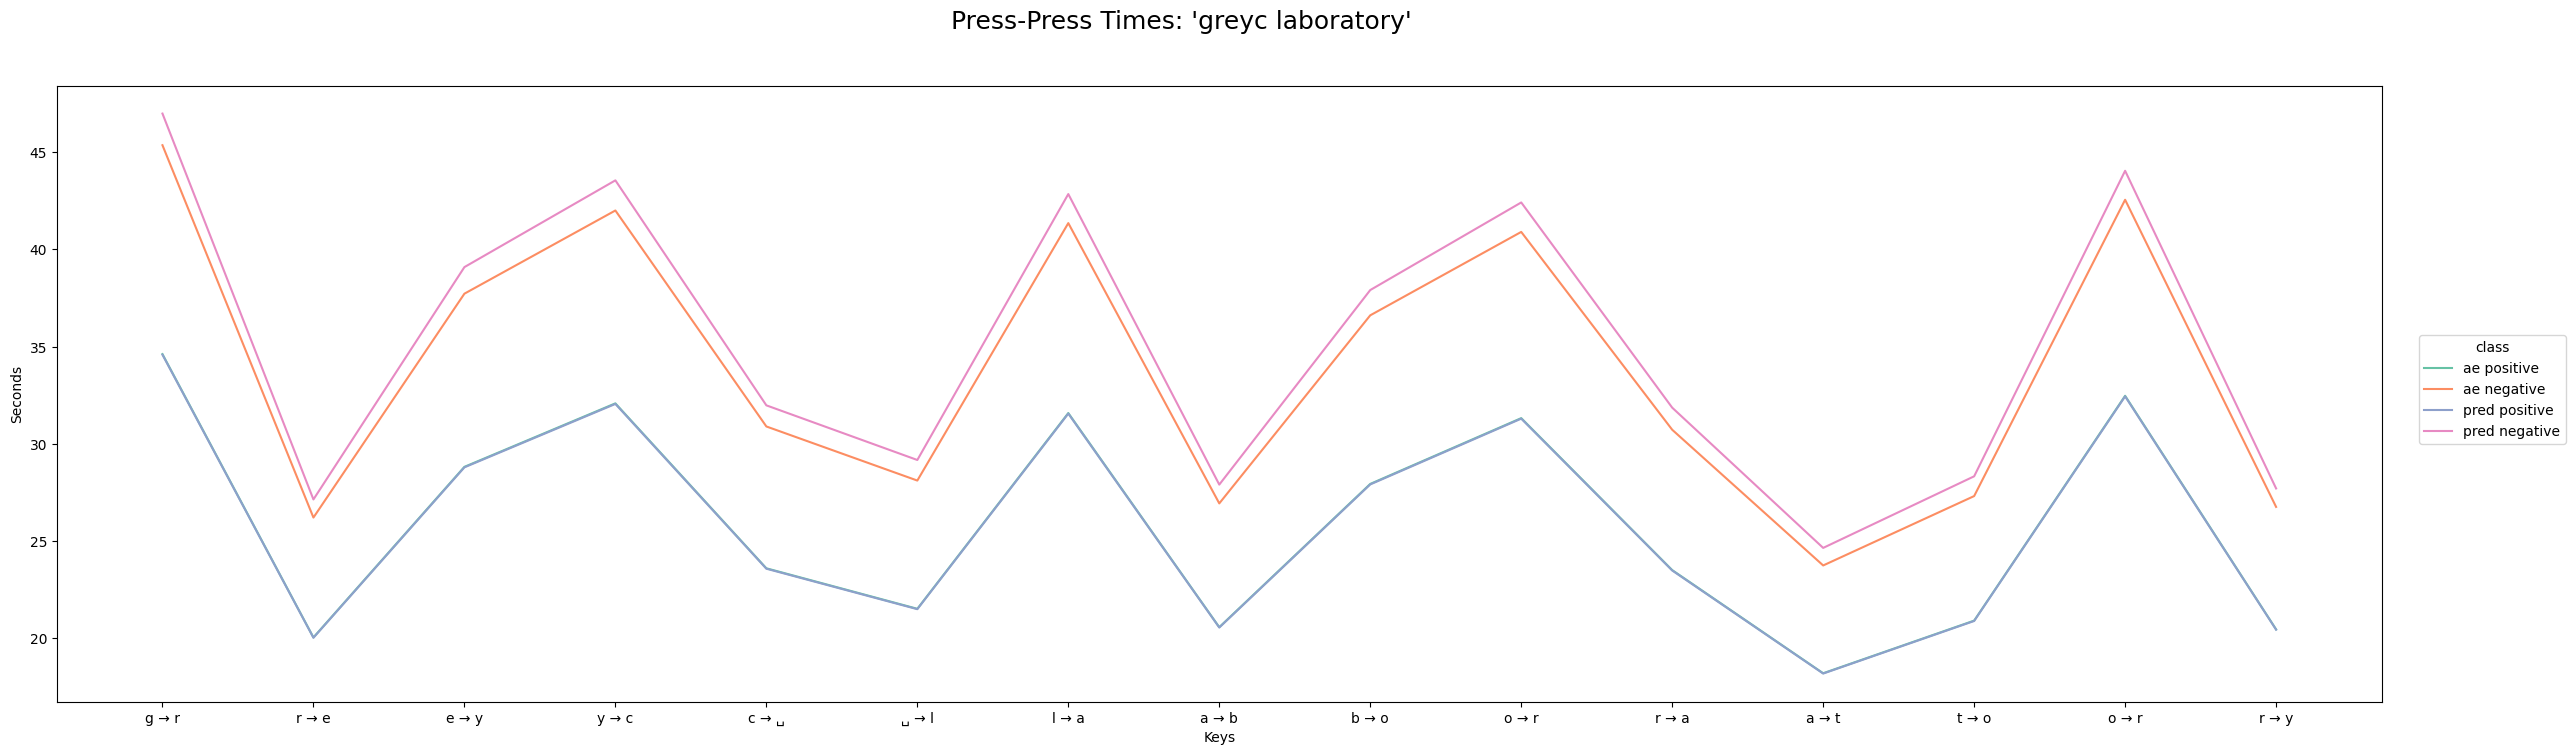

------------------------------------------------------------
Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 100
  optimizer: Adagrad
  learning rate: 0.03
  loss function: Hinge
  random seed: 555957319
  epochs trained: 100
L2 norms:
  positive: 0.03563854843378067
  negative: 75.40087127685547
  delta: 75.365234375
  ratio: 2114.711181640625
 


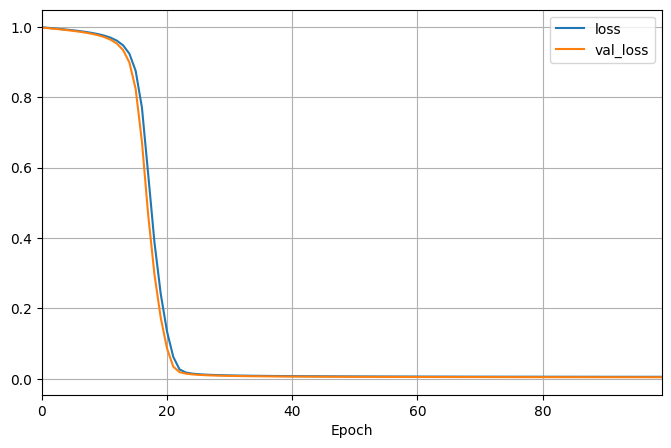

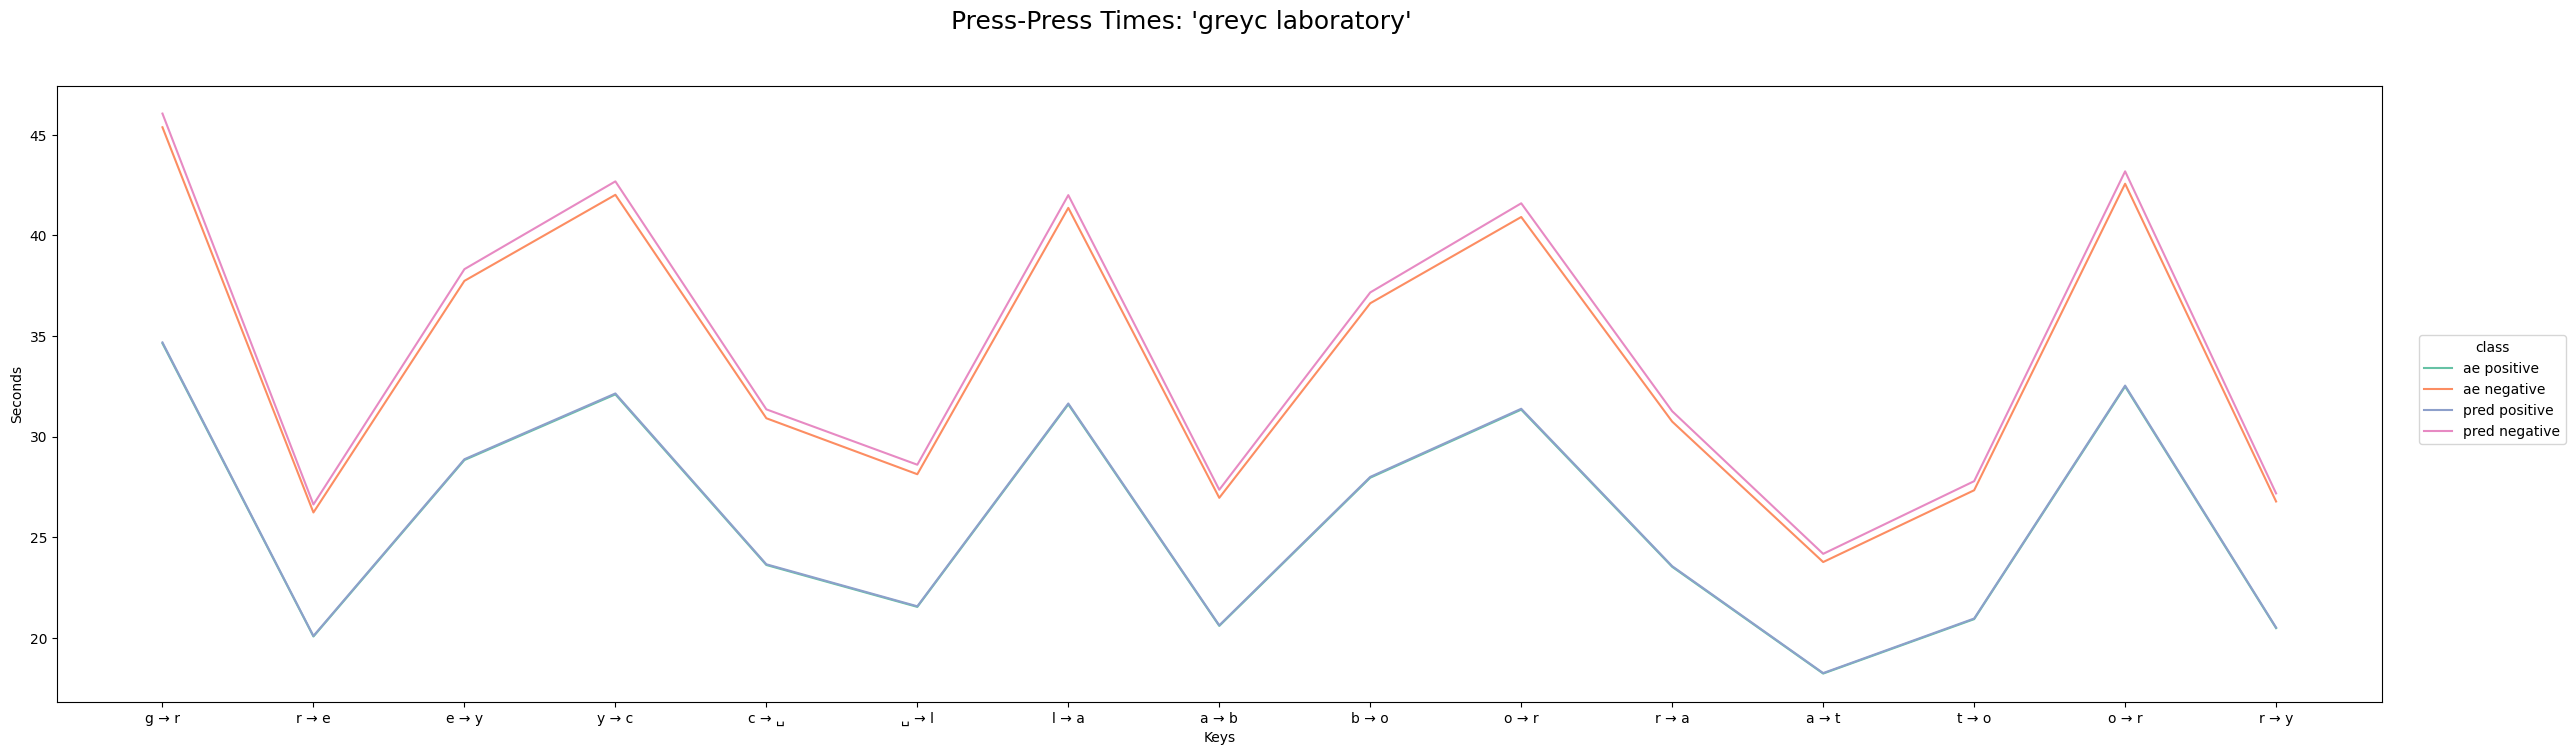

------------------------------------------------------------
Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 100
  optimizer: Adagrad
  learning rate: 0.03
  loss function: Hinge
  random seed: 251211325
  epochs trained: 100
L2 norms:
  positive: 0.03948577493429184
  negative: 79.72514343261719
  delta: 79.68566131591797
  ratio: 2018.0853271484375
 


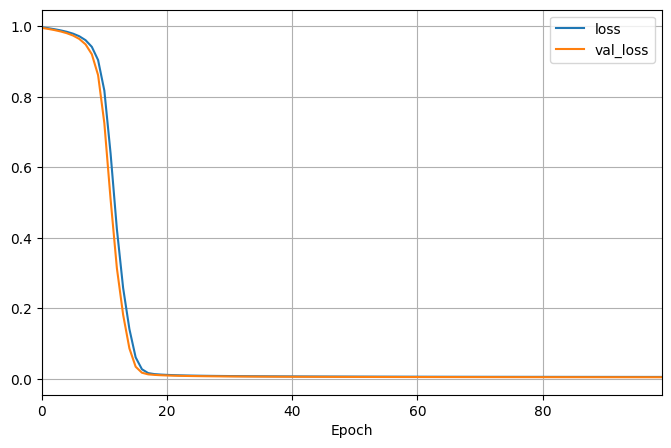

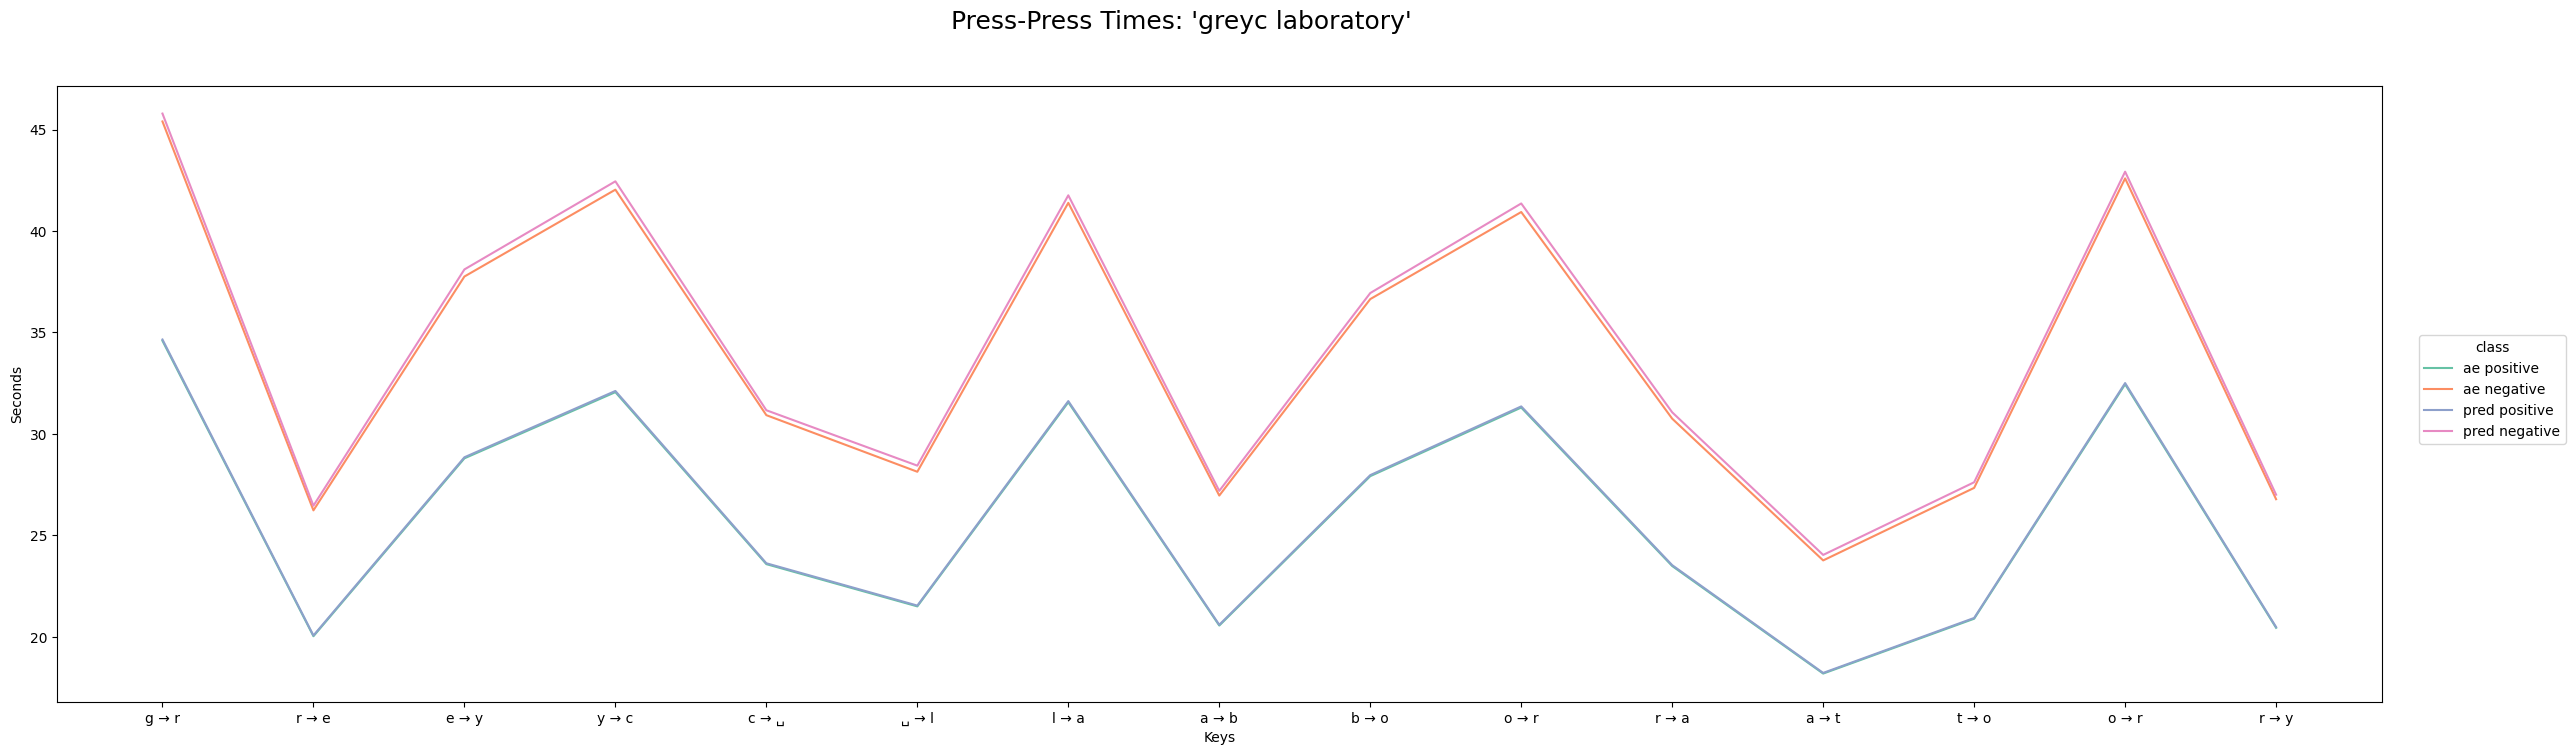

------------------------------------------------------------
Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 100
  optimizer: Adagrad
  learning rate: 0.03
  loss function: Hinge
  random seed: 981290523
  epochs trained: 100
L2 norms:
  positive: 0.04214787483215332
  negative: 74.59092712402344
  delta: 74.54878234863281
  ratio: 1768.7435302734375
 


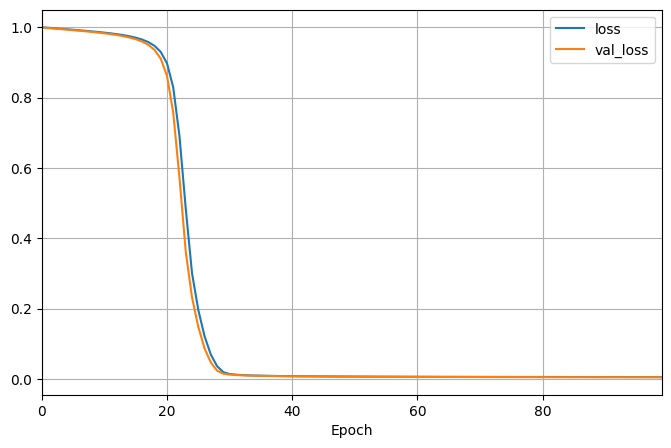

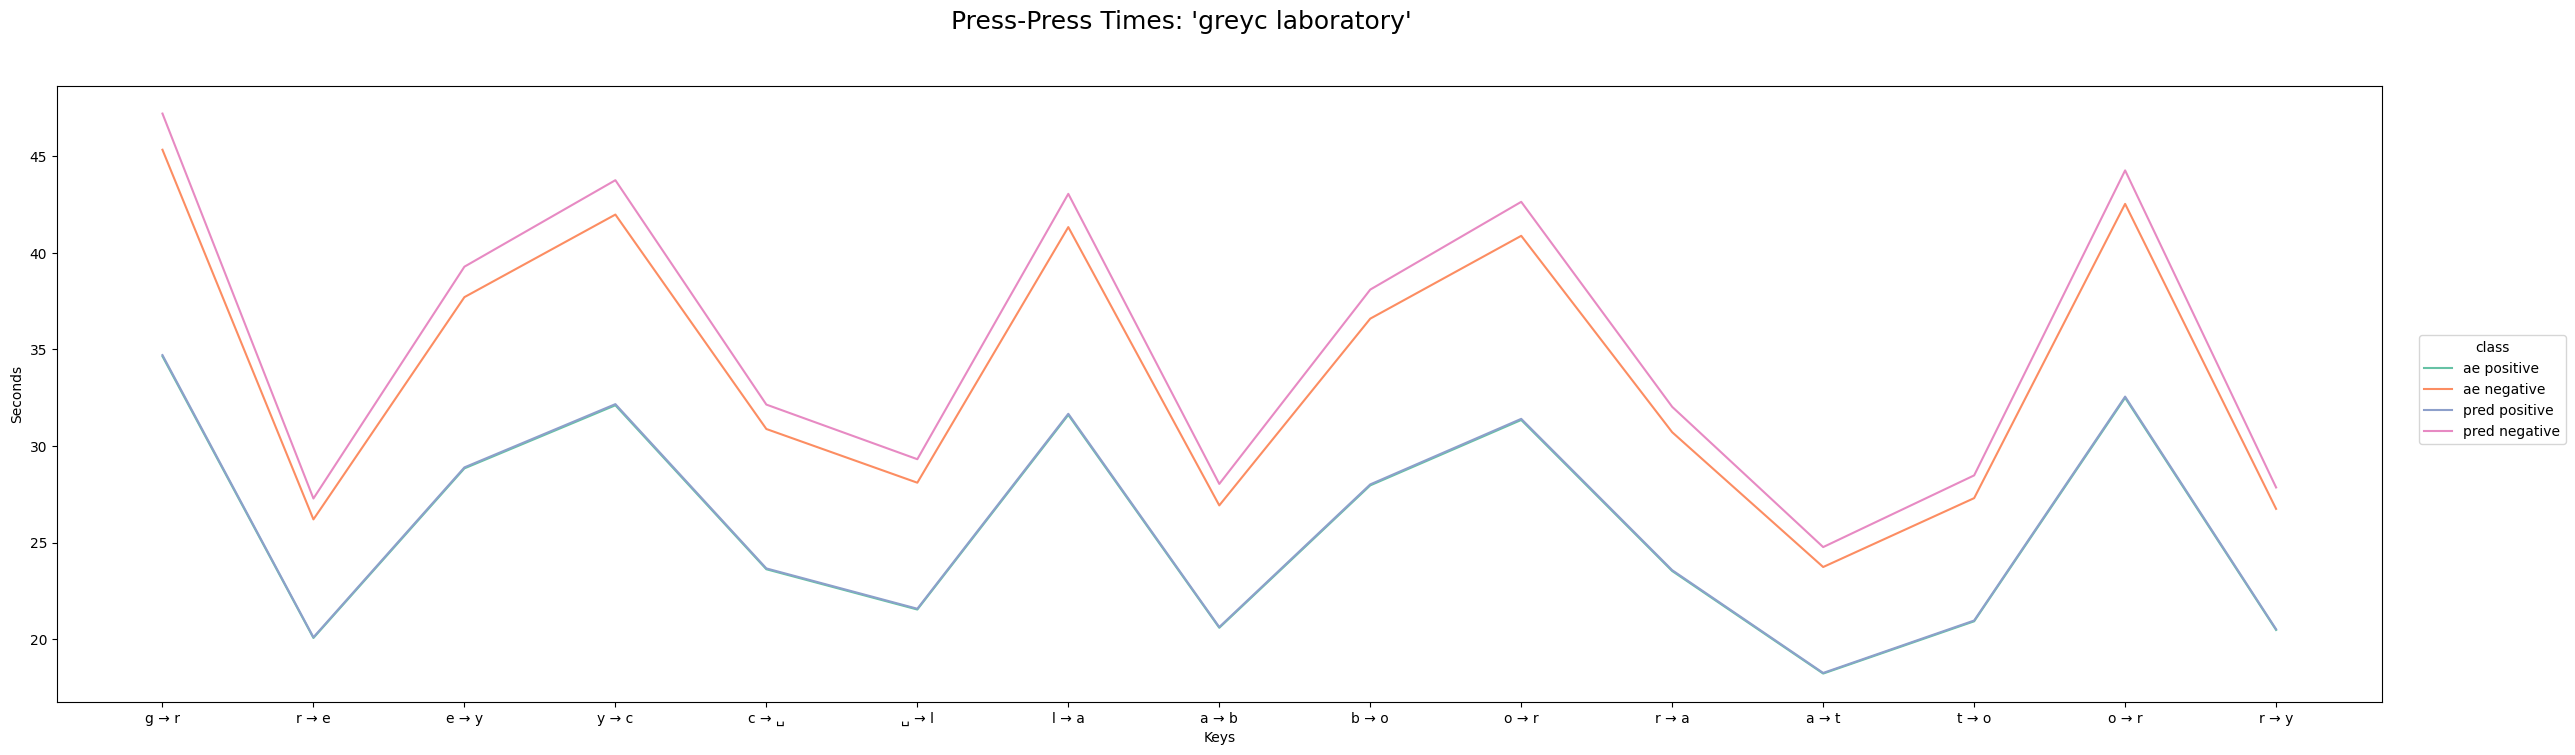

------------------------------------------------------------
Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 100
  optimizer: Adagrad
  learning rate: 0.03
  loss function: Hinge
  random seed: 889142695
  epochs trained: 100
L2 norms:
  positive: 0.0490042120218277
  negative: 80.84434509277344
  delta: 80.79534149169922
  ratio: 1648.7427978515625
 


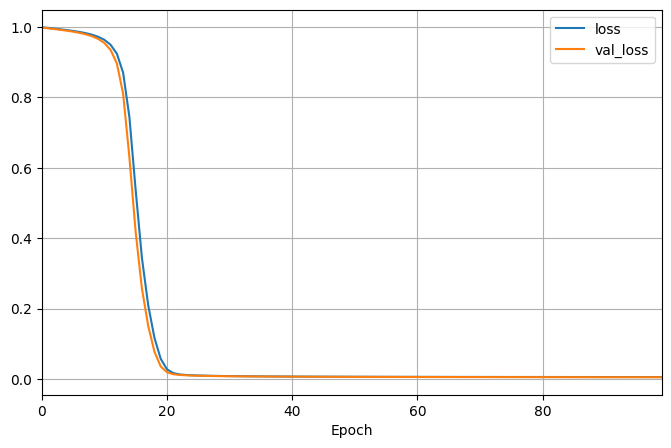

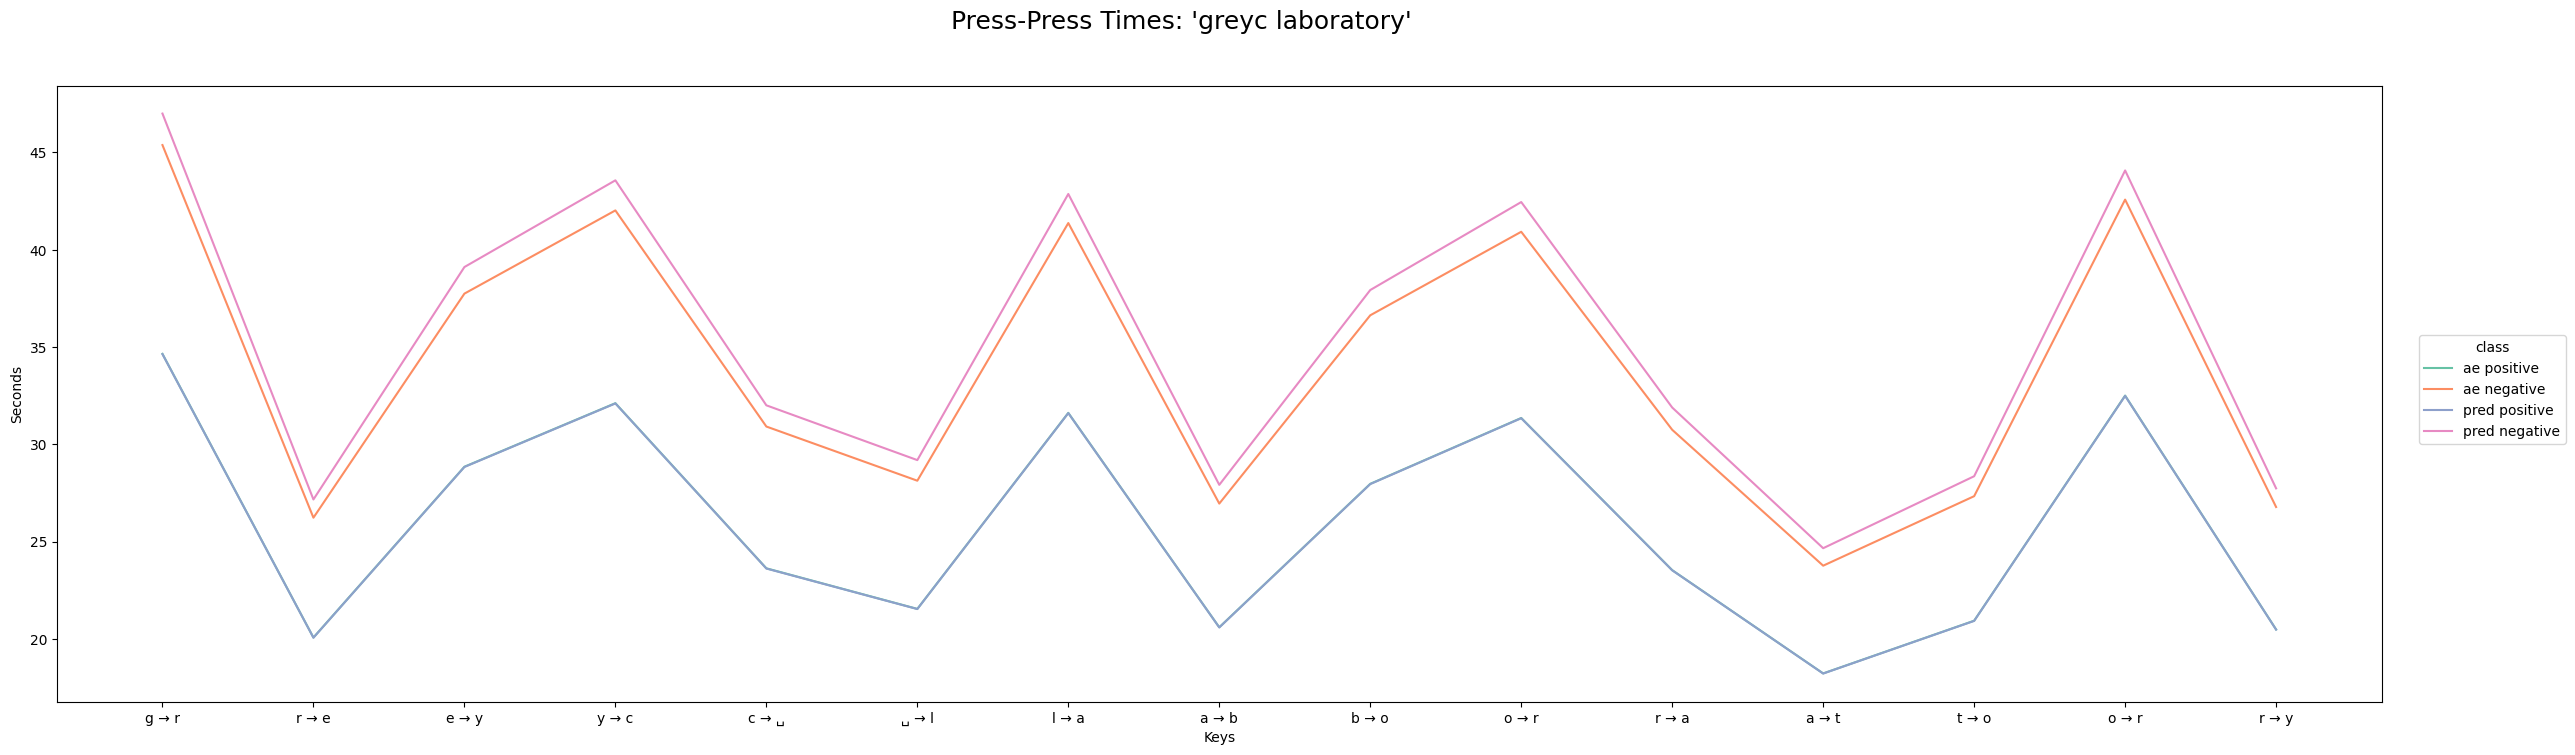

------------------------------------------------------------
Autoencoder Model:
  layers: 2
  activation: relu
  feature count: 76
  data size: 115
  augmentation factor: 10
  early stopping: 20
  epochs (max): 100
  optimizer: Adagrad
  learning rate: 0.03
  loss function: Hinge
  random seed: 894870336
  epochs trained: 100
L2 norms:
  positive: 0.04823705926537514
  negative: 74.30912780761719
  delta: 74.2608871459961
  ratio: 1539.4986572265625
 


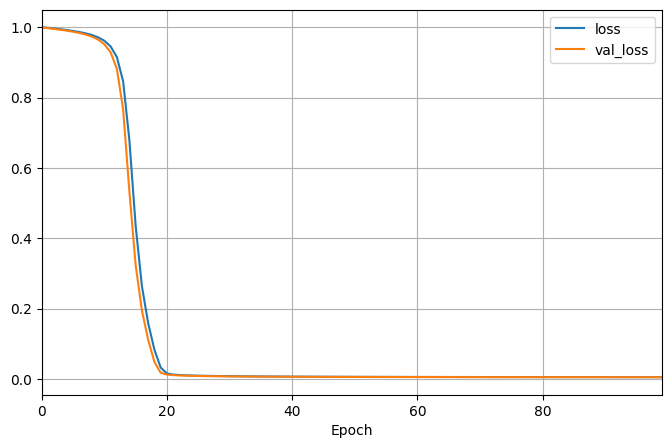

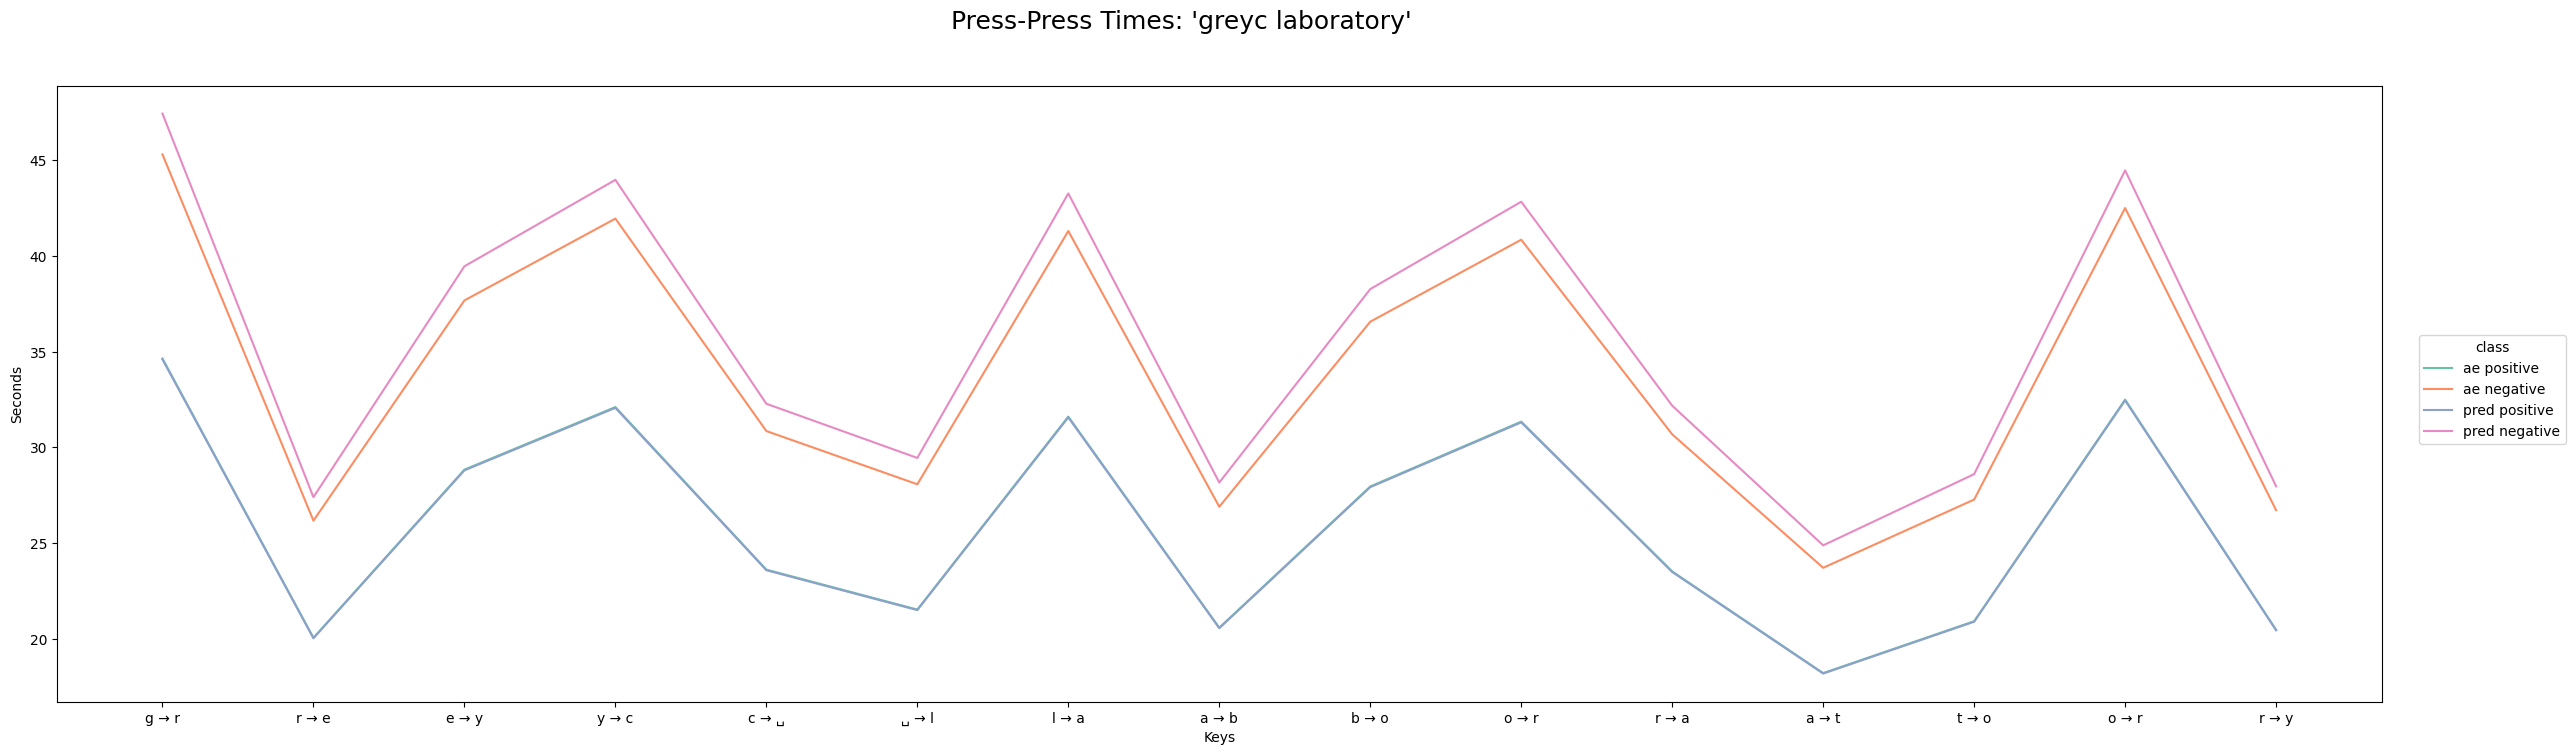

------------------------------------------------------------


In [35]:
autoencoders = [autoencoder for _, autoencoder in [(eval, ae) for eval, ae in zip(evaluated_autoencoders[0], evaluated_autoencoders[1])] if (autoencoder.euclidean_dist_delta) > 0 and (autoencoder.epochs >= autoencoder.max_epochs / 2)]
autoencoders = sorted(autoencoders, key=lambda ae: ae.euclidean_dist_ratio, reverse=True)

# Top 10
for ae in autoencoders[:10]:
    ae.print_evaluation(show_history=True, verbose=True)  
    pred_positive = autoencoder.predict(X[np.random.choice(len(X), 100, replace=False)])
    pred_negative = autoencoder.predict(N[np.random.choice(len(N), 100, replace=False)])

    ae_pos = autoencoder.generate_positive(1000)
    ae_neg = autoencoder.generate_negative(1000)
    
    ae_positive_dataframe = create_dataframe(ae_pos, 'ae positive', DATA_COLS)
    ae_negative_dataframe = create_dataframe(ae_neg, 'ae negative', DATA_COLS)
    pred_positive_dataframe = create_dataframe(pred_positive, 'pred positive', DATA_COLS)
    pred_negative_dataframe = create_dataframe(pred_negative, 'pred negative', DATA_COLS)

    combined_dataframe = pd.concat([ae_positive_dataframe, ae_negative_dataframe, pred_positive_dataframe, pred_negative_dataframe], ignore_index=True)
    for key_col in KEY_COLS:
        combined_dataframe[key_col] = pd.to_numeric(DATA[key_col][0], downcast='unsigned')
    
    plot_pp_data(combined_dataframe, DATA_PASSWORD, 
        class_categories=['ae positive', 'ae negative', 'pred positive', 'pred negative'],
        target_category=None,
        plot_type='line', #'datapoints', 'violin', 'overlap', 'line'
        trim_outliers=True,
        display=True,
        save=False
    )
    print('---'*20)

# Classifier Evaluation

In [137]:
%run "./4_Classifier.ipynb"

In [126]:
# Hyperparameter evaluation code moved to 4_Classifier.ipynb
# find_classifier_hyperparameters(autoencoders[:10], direct_to_file=True)

### Best Performing Classifiers (with selected autoencoders):

In [ ]:
reset_random_state(RANDOM_STATE)

ae1 = Autoencoder(X, DATA_PASSWORD, 'Adagrad', 0.03, 'Hinge', epochs=50, 
                          early_stopping_patience=20)
c1 = Classifier(ae1, 'Adadelta', 0.003, 'WeightedBinaryCrossentropy', epochs=600, #
                        early_stopping_patience=50, cross_validation_split=1, 
                        optimizer_kwargs={'weight_decay': 0.002, 'rho': 0.96, 'clipnorm': 0.01})

In [ ]:
ae1.print_evaluation(show_history=True) 
c1.print_evaluation(show_history=True)
print('Evaluation with real typing data: ')
evaluate_authentication(c1, positive_class_data, negative_class_data)
print('---'*20)

In [ ]:
ae2 = Autoencoder(X, DATA_PASSWORD, 'Adagrad', 0.01, 'Hinge', epochs=150, 
                          early_stopping_patience=20)
c2 = Classifier(ae2, 'Adadelta', 0.003, 'WeightedBinaryCrossentropy', epochs=600, #
                        early_stopping_patience=50, cross_validation_split=1, 
                        optimizer_kwargs={'weight_decay': 0.001, 'rho': 0.96})

In [ ]:
ae2.print_evaluation(show_history=True) 
c2.print_evaluation(show_history=True)
print('Evaluation with real typing data: ')
evaluate_authentication(c2, positive_class_data, negative_class_data)
print('---'*20)

In [ ]:
reset_random_state(RANDOM_STATE)

ae3 = Autoencoder(X, DATA_PASSWORD, 'Adagrad', 0.03, 'Hinge', epochs=50, early_stopping_patience=20)
c3 = Classifier(ae3, 'Ftrl', 0.001, 'BinaryCrossentropy', epochs=600, 
                        early_stopping_patience=50, cross_validation_split=1, 
                        optimizer_kwargs={}) #'weight_decay': 0.001

In [ ]:
ae3.print_evaluation(show_history=True) 
c3.print_evaluation(show_history=True)
print('Evaluation with real typing data: ')
evaluate_authentication(c3, positive_class_data, negative_class_data)
print('---'*20)